# Data Preprocessing, Feature Engineering and Exploration

In [1]:
import pandas as pd
import numpy as np
import os
import string
import unidecode
import webcolors
import cv2
from skimage import io
from scipy.spatial import KDTree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
def getDominantColor(path_file_name):
    """ Iterate through images and get the most dominant color.
    
    Args:
        img_name (string): filename of the image.
    Return:
        row {dict}: row containing information to append to dataframe.
        
    """

    # Read in image
    img = io.imread(path_file_name)[:, :, :]
    # Initialize list to store pixel colors
    pixels = []
    # Iterate through image (ie. 32x32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Retrieve RGB
            r = img[i, j, 0]
            g = img[i, j, 1]
            b = img[i, j, 2]
            # Ignore black colors (background)
            if ~((r < 15) & (g < 15) & (b < 15)):
                pixels.append([r, g, b])

    # Train KMeans model                    
    model = KMeans(n_clusters=5)
    kmeans = model.fit(pixels)
    # Find centroids
    centroids = kmeans.cluster_centers_.round()
    # Find most dominant color
    dominant_color = centroids[np.bincount(kmeans.predict(pixels)).argmax()]
    
    # To visualize proportion of centroids
    tmp = pd.DataFrame(zip(centroids, np.bincount(kmeans.predict(pixels))), columns=['rgb', 'counts'])
    # Set RGB and Hex
    rgb_color = dominant_color.astype('int')
    hex_color = webcolors.rgb_to_hex(rgb_color)
    # Prepare row with info
    row = {'Profile Image':img_name, 'image_rgb_color':rgb_color, 'image_hex_color':hex_color}
    
    #plt.plot([1,1,1,1], color=hex_color)
    
    return row

In [3]:
def loadImageData(path_name):
    df_image = pd.DataFrame()
    for img_name in os.listdir(path_name):

        path_file_name = path_name + img_name 
        df_image = df_image.append(getDominantColor(path_file_name), ignore_index=True)
    
    return df_image

In [4]:
path_name_train = 'data/ift6758-a20/train_profile_images/profile_images_train/'
#df_image_train = loadImageData(path_name_train)

df_image_train = pd.read_csv('images_train.csv')

In [6]:
path_name_test = 'data/ift6758-a20/test_profile_images/profile_images_test/'
#df_image_test = loadImageData(path_name_test)

df_image_test = pd.read_csv('images_test.csv')

In [7]:
def classifyHex(hex_code, color_set):
    if color_set.lower() == 'html4':
        hexnames = webcolors.HTML4_NAMES_TO_HEX
    elif color_set.lower() == 'css21':
        hexnames = webcolors.CSS21_NAMES_TO_HEX
    else: 
        hexnames = webcolors.CSS3_NAMES_TO_HEX
    
    names = []
    positions = []

    for name, hex in hexnames.items():
        names.append(name)
        positions.append(webcolors.hex_to_rgb(hex))

    spacedb = KDTree(positions)
    
    try:
        _, idx = spacedb.query(webcolors.hex_to_rgb(hex_code))
        return names[idx]
    except:
        return np.nan

In [8]:
df_train = pd.read_csv('data/ift6758-a20/train.csv')
df_test = pd.read_csv('data/ift6758-a20/test.csv')
pd.set_option('display.max_columns', None)
plt.style.use("seaborn")

In [9]:
df_train.head()

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,Location,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes
0,AL85S14OMDPF01I9,Mf9vfld4Vfe,NaN,Set,Verified,db1a2c,eaf0f2,e70409,False,39600.0,NaN,Enabled,en,Thu Nov 27 05:24:59 +0000 2008,Sydney,95763,4289,30809,873,business,14.792,1.5761,AL85S14OMDPF01I9.png,2815
1,HI11QOPD7BLJTO7Q,xl9gaGN0hxM_,NaN,Set,Verified,0099cc,f6ffd1,fff04d,False,NaN,mumbai,Enabled,en,Fri Jan 15 18:00:46 +0000 2010,NaN,1018746,289,8150,290,unknown,8.183,11.2782,HI11QOPD7BLJTO7Q.png,1242
2,JS49LP5P72RI1OQB,d_uiMm,NaN,Set,Not verified,1fc2de,efefef,1fc2de,False,-18000.0,NYC + 70 Countries Worldwide,Enabled,en,Fri Oct 02 20:15:06 +0000 2009,Central Time (US & Canada),13444,1876,4698,227,unknown,31.823,0.5725,JS49LP5P72RI1OQB.png,1559
3,S0GDSC09MACCLBJP,hfylaRr,https://blob/e/g9pex_vS.com,Not set,Verified,050000,616161,00090a,False,-14400.0,"Indianapolis, In",Enabled,en,Thu Feb 19 14:37:22 +0000 2009,Eastern Time (US & Canada),339168,1148,53216,4035,business,23.052,4.0265,S0GDSC09MACCLBJP.png,6342
4,CRSEMK4QER6LDJSA,hRR1sDGlz5,https://blob/v/Szeo.h4/.com,Set,Not verified,58424d,f7f7f7,000000,False,-18000.0,"777 Beach Blvd. Biloxi, MS",Enabled,en,Tue Mar 31 13:27:52 +0000 2009,Central Time (US & Canada),9215,93,3271,130,unknown,8.418,3.9229,CRSEMK4QER6LDJSA.png,1078


## Merge Images 

In [11]:
df_train = df_train.merge(df_image_train, on='Profile Image', how='left')
df_test = df_test.merge(df_image_test, on='Profile Image', how='left')

## Feature Engineering

In [12]:
def dataPreprocessing(df_input):
    
    # Make a copy to not overwrite original dataframe
    df = df_input.copy()
    
    if 'Num of Profile Likes' in df.columns:
        df['num_profile_likes_log'] = np.log(df['Num of Profile Likes'] + 1)
    
    # Length of User Name
    df['user_name_length'] = df['User Name'].str.len()

    # Binary URL 
    df['personal_url_binary'] = np.where(df['Personal URL'].notnull(), 1, 0)

    # Binary Profile Cover Image Status
    df['cover_image_binary'] = np.where(df['Profile Cover Image Status'] == 'Set', 1, 0)

    # One-Hot encode Profile Verification Status
    df = df.merge(pd.get_dummies(df['Profile Verification Status'].str.lower(), prefix='verification_status'),
                             left_index=True, right_index=True)
    
    # Classify and One-Hot encode profile Text, Page and Theme colors
    for color_field in ['Profile Text Color', 'Profile Page Color', 'Profile Theme Color']:
        var_name = color_field.lower().replace(' ', '_')
        df[var_name] = df[color_field].apply(lambda x: classifyHex('#'+str(x), 'html4'))
        df = df.merge(pd.get_dummies(df[var_name].str.lower(), prefix=var_name),
                      left_index=True, right_index=True)
    
    # Binary Is Profile View Size Customized?
    df['profile_view_size_custom'] = np.where(df['Is Profile View Size Customized?'] == True, 1, 0)
    
    # One-Hot encode UTC Offset
    df['utc_offset'] = np.where(df['UTC Offset'].isnull(), 'unk', df['UTC Offset'])
    df.loc[df.groupby('utc_offset')['utc_offset'].transform('count').lt(10), 'utc_offset'] = 'other'
    df = df.merge(pd.get_dummies(df['utc_offset'], prefix='utc_offset_'),
                  left_index=True, right_index=True)

    # Clean up Location
    location_dict = {'barcelona':'barcelona, spain', 'chicago':'chicago, il', 'ciudad de mexico':'mexico city, mexico', 'espana':'spain', 'global':'worldwide', 'london':'london, uk', 'london, england':'london, uk', 'los angeles':'los angeles, ca', 'istanbul, turkiye':'istanbul, turkey', 'i̇stanbul':'istanbul, turkey', 'istanbul':'istanbul, turkey', 'jakarta':'jakarta, indonesia', 'kingdom of saudi arabia':'saudi arabia', 'las vegas':'las vegas, nv', 'madrid':'madrid, spain', 'méxico':'mexico', 'mumbai':'mumbai, india', 'new york':'new york, ny', 'new york city':'new york, ny', 'nyc':'new york, ny', 'paris':'paris, france', 'rio de janeiro':'rio de janeiro, brasil', 'sao paulo':'sao paulo, brasil', 'türkiye':'turkey', 'usa':'united states', 'uk':'united kingdom'}
    states_abbrev_dict = {'.*, al$':'alabama', '.*, ak$':'alaska', '.*, az$':'arizona', '.*, ar$':'arkansas', '.*, ca$':'california', '.*, co$':'colorado', '.*, ct$':'connecticut', '.*, de$':'delaware', '.*, fl$':'florida', '.*, ga$':'georgia', '.*, hi$':'hawaii', '.*, id$':'idaho', '.*, il$':'illinois', '.*, in$':'indiana', '.*, ia$':'iowa', '.*, ks$':'kansas', '.*, ky$':'kentucky', '.*, la$':'louisiana', '.*, me$':'maine', '.*, md$':'maryland', '.*, ma$':'massachusetts', '.*, mi$':'michigan', '.*, mn$':'minnesota', '.*, ms$':'mississippi', '.*, mo$':'missouri', '.*, mt$':'montana', '.*, ne$':'nebraska', '.*, nv$':'nevada', '.*, nh$':'new hampshire', '.*, nj$':'new jersey', '.*, nm$':'new mexico', '.*, ny$':'new york', '.*, nc$':'north carolina', '.*, nd$':'north dakota', '.*, oh$':'ohio', '.*, ok$':'oklahoma', '.*, or$':'oregon', '.*, pa$':'pennsylvania', '.*, ri$':'rhode island', '.*, sc$':'south carolina', '.*, sd$':'south dakota', '.*, tn$':'tennessee', '.*, tx$':'texas', '.*, ut$':'utah', '.*, vt$':'vermont', '.*, va$':'virginia', '.*, wa$':'washington', '.*, wv$':'west virginia', '.*, wi$':'wisconsin', '.*, wy$':'wyoming'}
    #states_abbrev_dict2 = {'.*alabama.*':'alabama', '.*alaska.*':'alaska', '.*arizona.*':'arizona', '.*arkansas.*':'arkansas', '.*california.*':'california', '.*colorado.*':'colorado', '.*connecticut.*':'connecticut', '.*delaware.*':'delaware', '.*florida.*':'florida', '.*georgia.*':'georgia', '.*hawaii.*':'hawaii', '.*idaho.*':'idaho', '.*illinois.*':'illinois', '.*indiana.*':'indiana', '.*iowa.*':'iowa', '.*kansas.*':'kansas', '.*kentucky.*':'kentucky', '.*louisiana.*':'louisiana', '.*maine.*':'maine', '.*maryland.*':'maryland', '.*massachusetts.*':'massachusetts', '.*michigan.*':'michigan', '.*minnesota.*':'minnesota', '.*mississippi.*':'mississippi', '.*missouri.*':'missouri', '.*montana.*':'montana', '.*nebraska.*':'nebraska', '.*nevada.*':'nevada', '.*new hampshire.*':'new hampshire', '.*new jersey.*':'new jersey', '.*new mexico.*':'new mexico', '.*new york.*':'new york', '.*north carolina.*':'north carolina', '.*north dakota.*':'north dakota', '.*ohio.*':'ohio', '.*oklahoma.*':'oklahoma', '.*oregon.*':'oregon', '.*pennsylvania.*':'pennsylvania', '.*rhode island.*':'rhode island', '.*south carolina.*':'south carolina', '.*south dakota.*':'south dakota', '.*tennessee.*':'tennessee', '.*texas.*':'texas', '.*utah.*':'utah', '.*vermont.*':'vermont', '.*virginia.*':'virginia', '.*washington.*':'washington', '.*west virginia.*':'west virginia', '.*wisconsin.*':'wisconsin', '.*wyoming.*':'wyoming'}
    states_abbrev_dict2 = {'.*alabama.*':'united states', '.*alaska.*':'united states', '.*arizona.*':'united states', '.*arkansas.*':'united states', '.*california.*':'united states', '.*colorado.*':'united states', '.*connecticut.*':'united states', '.*delaware.*':'united states', '.*florida.*':'united states', '.*georgia.*':'united states', '.*hawaii.*':'united states', '.*idaho.*':'united states', '.*illinois.*':'united states', '.*indiana.*':'united states', '.*iowa.*':'united states', '.*kansas.*':'united states', '.*kentucky.*':'united states', '.*louisiana.*':'united states', '.*maine.*':'united states', '.*maryland.*':'united states', '.*massachusetts.*':'united states', '.*michigan.*':'united states', '.*minnesota.*':'united states', '.*mississippi.*':'united states', '.*missouri.*':'united states', '.*montana.*':'united states', '.*nebraska.*':'united states', '.*nevada.*':'united states', '.*new hampshire.*':'united states', '.*new jersey.*':'united states', '.*new mexico.*':'united states', '.*new york.*':'united states', '.*north carolina.*':'united states', '.*north dakota.*':'united states', '.*ohio.*':'united states', '.*oklahoma.*':'united states', '.*oregon.*':'united states', '.*pennsylvania.*':'united states', '.*rhode island.*':'united states', '.*south carolina.*':'united states', '.*south dakota.*':'united states', '.*tennessee.*':'united states', '.*texas.*':'united states', '.*utah.*':'united states', '.*vermont.*':'united states', '.*virginia.*':'united states', '.*washington.*':'united states', '.*west virginia.*':'united states', '.*wisconsin.*':'united states', '.*wyoming.*':'united states'}
    cities_2_countries = {'.*brasil.*':'brazil', '.*brazil.*':'brazil', '.*spain.*':'spain', '.*mexico.*':'mexico', '.*france.*':'france', '.* uk.*':'united kingdom', '.*india.*':'india', '.*istanbul.*':'turkey', '.*indonesia.*':'indonesia', '.*tokyo.*':'japan', '.*japan.*':'japan'}
    df['location_clean'] = df['Location'].str.lower()
    df['location_clean'] = df['location_clean'].str.strip().replace({'.*москва.*':'moscow, russia', '.*東京.*':'tokyo, japan', '.*京都.*':'kyoto, japan', '.*日本.*':'japan', '.*السعودية.*':'saudi arabia', '대한민국':'south korea'}, regex=True)
    df['location_clean'] = df['location_clean'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df['location_clean'] = df['location_clean'].str.replace('[0-9.]', '', regex=True)
    df['location_clean'] = df['location_clean'].str.strip().replace(location_dict) # 1 to 1 replacements
    df['location_clean'] = df['location_clean'].str.strip().replace(states_abbrev_dict, regex=True) # regex replacements
    df['location_clean'] = df['location_clean'].str.strip().replace(states_abbrev_dict2, regex=True) # regex replacements
    df['location_clean'] = df['location_clean'].str.strip().replace(cities_2_countries, regex=True) # regex replacements
    
    df['location_top'] = np.where(~df['location_clean'].isin(['united states', 'united kingdom', 'brazil', 'india', 'mexico', 'france', 'worldwide', 'indonesia', 'spain', 'turkey']), 'other', df['location_clean'])
    df = df.merge(pd.get_dummies(df['location_top'], prefix='location_top'),
                  left_index=True, right_index=True)
    
    # Binary Location availability
    df['location_binary'] = np.where(df['Location'].isnull(), 0, 1)

    # Binary Location Public Visibility
    df['location_public_binary'] = np.where(df['Location Public Visibility'].str.lower() == 'enabled', 1,
                                                 np.where(df['Location Public Visibility'].str.lower() == 'disabled', 0, 
                                                          2)) # 2 is '??'

    # One-Hot encode User Language
    df['user_language'] = df['User Language'].str.replace('uk', 'en-gb')
    df.loc[df.groupby('user_language')['user_language'].transform('count').lt(10), 'user_language'] = 'other'
    df = df.merge(pd.get_dummies(df['user_language'].str.lower(), prefix='user_lang'), left_index=True, right_index=True)

    # Format Profile Creation Timestamp
    df['profile_creation_timestamp'] = pd.to_datetime(df['Profile Creation Timestamp'], 
                                                            format='%a %b %d %H:%M:%S %z %Y')
    df['profile_creation_year'] = df['profile_creation_timestamp'].dt.year
    df['profile_creation_month'] = df['profile_creation_timestamp'].dt.month
    df['profile_creation_day'] = df['profile_creation_timestamp'].dt.day

    # Clean User Time Zone
    # TODO
    df['user_timezone'] = df['User Time Zone']
    df['user_timezone'] = np.where(df['user_timezone'].isnull(), 'unk', df['user_timezone'])
    df.loc[df.groupby('user_timezone')['user_timezone'].transform('count').lt(10), 'user_timezone'] = 'other'
    df = df.merge(pd.get_dummies(df['user_timezone'].str.lower(), prefix='user_timezone'), left_index=True, right_index=True)
    
    # Set missing to mean for Avg Daily Profile Visit Duration in seconds
    avg_daily_visit_duration_median = np.nanmedian(df['Avg Daily Profile Visit Duration in seconds'])
    df.loc[df['Avg Daily Profile Visit Duration in seconds'].isnull(), 'Avg Daily Profile Visit Duration in seconds'] = avg_daily_visit_duration_median
    df['avg_daily_profile_visit_duration'] = df['Avg Daily Profile Visit Duration in seconds']
    
    # Set missing to mean for Avg Daily Profile Visit Duration in seconds
    avg_daily_profile_clicks_median = np.nanmedian(df['Avg Daily Profile Clicks'])
    df.loc[df['Avg Daily Profile Clicks'].isnull(), 'Avg Daily Profile Clicks'] = avg_daily_profile_clicks_median
    
    # Log Transform Numerical
    df['num_followers_log'] = np.log(np.sqrt(df['Num of Followers']) + 1)
    df['num_people_following_log'] = np.log(np.sqrt(df['Num of People Following']) + 1)
    df['num_status_updates_log'] = np.log(np.sqrt(df['Num of Status Updates']) + 1)
    df['num_direct_messages_log'] = np.log(np.sqrt(df['Num of Direct Messages']) + 1)
    df['avg_daily_profile_clicks_log'] = np.log(np.sqrt(df['Avg Daily Profile Clicks']) + 1)

    # One-Hot encode Profile Category
    df['Profile Category'] = np.where(df['Profile Category'] == ' ', 'unknown', df['Profile Category'])
    df = df.merge(pd.get_dummies(df['Profile Category'].str.lower(), prefix='profile_category'),
                             left_index=True, right_index=True)
    
    # Image color
    df['image_html_color'] = df['image_hex_color'].apply(lambda x: classifyHex(str(x), 'ccs3'))
    
    # MinMax numerical variables
    scaler = preprocessing.MinMaxScaler()
    numerical = ['user_name_length', 'profile_creation_year', 'profile_creation_month', 'num_followers_log', 'num_people_following_log', 'num_status_updates_log', 'num_direct_messages_log', 'avg_daily_profile_visit_duration', 'avg_daily_profile_clicks_log', 'profile_creation_year', 'profile_creation_month', 'profile_creation_day']
    for feat in numerical:
        df[[feat + '_norm']] = scaler.fit_transform(df[[feat]])
    
    return (df)

In [13]:
df_train_clean = dataPreprocessing(df_train)

In [14]:
df_train_clean.head()

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,Location,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes,Unnamed: 0,image_hex_color,image_rgb_color,num_profile_likes_log,user_name_length,personal_url_binary,cover_image_binary,verification_status_not verified,verification_status_pending,verification_status_verified,profile_text_color,profile_text_color_aqua,profile_text_color_black,profile_text_color_blue,profile_text_color_fuchsia,profile_text_color_gray,profile_text_color_green,profile_text_color_lime,profile_text_color_maroon,profile_text_color_navy,profile_text_color_olive,profile_text_color_purple,profile_text_color_red,profile_text_color_silver,profile_text_color_teal,profile_text_color_white,profile_text_color_yellow,profile_page_color,profile_page_color_aqua,profile_page_color_black,profile_page_color_blue,profile_page_color_fuchsia,profile_page_color_gray,profile_page_color_green,profile_page_color_lime,profile_page_color_maroon,profile_page_color_navy,profile_page_color_olive,profile_page_color_purple,profile_page_color_red,profile_page_color_silver,profile_page_color_teal,profile_page_color_white,profile_page_color_yellow,profile_theme_color,profile_theme_color_aqua,profile_theme_color_black,profile_theme_color_blue,profile_theme_color_fuchsia,profile_theme_color_gray,profile_theme_color_green,profile_theme_color_lime,profile_theme_color_maroon,profile_theme_color_navy,profile_theme_color_olive,profile_theme_color_purple,profile_theme_color_red,profile_theme_color_silver,profile_theme_color_teal,profile_theme_color_white,profile_theme_color_yellow,profile_view_size_custom,utc_offset,utc_offset__-10800.0,utc_offset__-14400.0,utc_offset__-18000.0,utc_offset__-21600.0,utc_offset__-25200.0,utc_offset__-28800.0,utc_offset__-36000.0,utc_offset__-39600.0,utc_offset__-7200.0,utc_offset__10800.0,utc_offset__14400.0,utc_offset__18000.0,utc_offset__19800.0,utc_offset__25200.0,utc_offset__28800.0,utc_offset__32400.0,utc_offset__3600.0,utc_offset__36000.0,utc_offset__39600.0,utc_offset__46800.0,utc_offset__7200.0,utc_offset__other,utc_offset__unk,location_clean,location_top,location_top_brazil,location_top_france,location_top_india,location_top_indonesia,location_top_mexico,location_top_other,location_top_spain,location_top_turkey,location_top_united kingdom,location_top_united states,location_top_worldwide,location_binary,location_public_binary,user_language,user_lang_ar,user_lang_de,user_lang_en,user_lang_en-gb,user_lang_es,user_lang_fr,user_lang_id,user_lang_it,user_lang_ja,user_lang_ko,user_lang_nl,user_lang_other,user_lang_pl,user_lang_pt,user_lang_ru,user_lang_tr,profile_creation_timestamp,profile_creation_year,profile_creation_month,profile_creation_day,user_timezone,user_timezone_abu dhabi,user_timezone_alaska,user_timezone_america/new_york,user_timezone_amsterdam,user_timezone_arizona,user_timezone_athens,user_timezone_atlantic time (canada),user_timezone_baghdad,user_timezone_bangkok,user_timezone_beijing,user_timezone_belgrade,user_timezone_berlin,user_timezone_bern,user_timezone_bogota,user_timezone_brasilia,user_timezone_brussels,user_timezone_buenos aires,user_timezone_cairo,user_timezone_caracas,user_timezone_casablanca,user_timezone_central america,user_timezone_central time (us & canada),user_timezone_chennai,user_timezone_copenhagen,user_timezone_dublin,user_timezone_eastern time (us & canada),user_timezone_greenland,user_timezone_hanoi,user_timezone_hawaii,user_timezone_hong kong,user_timezone_irkutsk,user_timezone_islamabad,user_timezone_istanbul,user_timezone_jakarta,user_timezone_jerusalem,user_timezone_karachi,user_timezone_kuala lumpur

In [15]:
df_test_clean = dataPreprocessing(df_test)

In [16]:
def aggregateCategories(df_train_clean, df_test_clean):
    """ Function helps create bins based on the profile images likes.
    
    Args:
        df_train_clean (DataFrame): partially preprocessed train dataframe.
        df_test_clean (DataFrame): partially preprocessed test dataframe.
    Return:
        df_train_clean (DataFrame): updated train dataframe.
        df_test_clean (DataFrame): updated test dataframe.
        
    """
    
    # Username Length
    user_name_length_ref = pd.DataFrame(df_train_clean.groupby('user_name_length')['num_profile_likes_log'].agg('median')).reset_index()
    user_name_length_ref['user_name_length_bins'] = np.where(user_name_length_ref['num_profile_likes_log'] < 7.5, 1, 2)
    user_name_length_ref.drop('num_profile_likes_log', axis=1, inplace=True)
    
    # UTC Offset Bins
    utc_offset_ref = pd.DataFrame(df_train_clean.groupby('utc_offset')['num_profile_likes_log'].agg('median')).reset_index()
    utc_offset_ref['utc_offset_bins'] = np.where(utc_offset_ref['num_profile_likes_log'] < 5, 1,
                                         np.where(utc_offset_ref['num_profile_likes_log'] < 6, 2,
                                                  np.where(utc_offset_ref['num_profile_likes_log'] < 7, 3,
                                                  np.where(utc_offset_ref['num_profile_likes_log'] < 7.5, 4, 5))))
    utc_offset_ref.drop('num_profile_likes_log', axis=1, inplace=True)
    
    # User Language Bins
    user_language_ref = pd.DataFrame(df_train_clean.groupby('user_language')['num_profile_likes_log'].agg('median')).reset_index()
    user_language_ref['user_language_bins'] = np.where(user_language_ref['num_profile_likes_log'] < 4, 1,
                                                       np.where(user_language_ref['num_profile_likes_log'] < 5, 2,
                                                                np.where(user_language_ref['num_profile_likes_log'] < 6, 3,
                                                                         np.where(user_language_ref['num_profile_likes_log'] < 7, 4,
                                                                             np.where(user_language_ref['num_profile_likes_log'] < 7.25, 5, 6)))))
    user_language_ref.drop('num_profile_likes_log', axis=1, inplace=True)
    
    # User Timezone Bins
    user_timezone_ref = pd.DataFrame(df_train_clean.groupby('user_timezone')['num_profile_likes_log'].agg('median')).reset_index()
    user_timezone_ref['user_timezone_bins'] = np.where(user_timezone_ref['num_profile_likes_log'] < 4, 1,
                                                       np.where(user_timezone_ref['num_profile_likes_log'] < 5, 2,
                                                                np.where(user_timezone_ref['num_profile_likes_log'] < 6, 3,
                                                                         np.where(user_timezone_ref['num_profile_likes_log'] < 7, 4,
                                                                                  np.where(user_timezone_ref['num_profile_likes_log'] < 8, 5, 6)))))
    user_timezone_ref.drop('num_profile_likes_log', axis=1, inplace=True)
    
    # Location Bins
    location_clean_ref = pd.DataFrame(df_train_clean.groupby('location_clean')['num_profile_likes_log'].agg('median')).reset_index()
    location_clean_ref['location_clean_bins'] = np.where(location_clean_ref['num_profile_likes_log'] < 4.5, 1,
                                                       np.where(location_clean_ref['num_profile_likes_log'] < 5.5, 2,
                                                                np.where(location_clean_ref['num_profile_likes_log'] < 6.5, 3,
                                                                         np.where(location_clean_ref['num_profile_likes_log'] < 7.5, 4,
                                                                                  np.where(location_clean_ref['num_profile_likes_log'] < 8.5, 5,
                                                                                           np.where(location_clean_ref['num_profile_likes_log'] < 9.5, 6,
                                                                                              np.where(location_clean_ref['num_profile_likes_log'] < 10.5, 7, 8)))))))
    location_clean_ref.drop('num_profile_likes_log', axis=1, inplace=True)
    
    # Image Color Bins
    image_html_color_ref = pd.DataFrame(df_train_clean.groupby('image_html_color')['num_profile_likes_log'].agg('median')).reset_index()
    image_html_color_ref['image_html_color_bins'] = np.where(image_html_color_ref['num_profile_likes_log'] < 5, 1,
                                                             np.where(image_html_color_ref['num_profile_likes_log'] < 6, 2,
                                                                      np.where(image_html_color_ref['num_profile_likes_log'] < 7, 3,
                                                                               np.where(image_html_color_ref['num_profile_likes_log'] < 7.5, 4,
                                                                                   np.where(image_html_color_ref['num_profile_likes_log'] < 8, 5, 6)))))
    image_html_color_ref.drop('num_profile_likes_log', axis=1, inplace=True)
    
    # Merge
    df_train_clean = df_train_clean.merge(user_name_length_ref, on='user_name_length', how='left')
    df_train_clean = df_train_clean.merge(utc_offset_ref, on='utc_offset', how='left')
    df_train_clean = df_train_clean.merge(user_language_ref, on='user_language', how='left')
    df_train_clean = df_train_clean.merge(user_timezone_ref, on='user_timezone', how='left')
    df_train_clean = df_train_clean.merge(location_clean_ref, on='location_clean', how='left')
    df_train_clean = df_train_clean.merge(image_html_color_ref, on='image_html_color', how='left')
    
    df_test_clean = df_test_clean.merge(user_name_length_ref, on='user_name_length', how='left')
    df_test_clean = df_test_clean.merge(utc_offset_ref, on='utc_offset', how='left')
    df_test_clean = df_test_clean.merge(user_language_ref, on='user_language', how='left')
    df_test_clean = df_test_clean.merge(user_timezone_ref, on='user_timezone', how='left')
    df_test_clean = df_test_clean.merge(location_clean_ref, on='location_clean', how='left')
    df_test_clean = df_test_clean.merge(image_html_color_ref, on='image_html_color', how='left')
    
    df_train_clean.loc[df_train_clean['location_clean_bins'].isnull(), 'location_clean_bins'] = 0
    df_test_clean.loc[df_test_clean['location_clean_bins'].isnull(), 'location_clean_bins'] = 0
    df_train_clean.loc[df_train_clean['image_html_color_bins'].isnull(), 'image_html_color_bins'] = 0
    df_test_clean.loc[df_test_clean['image_html_color_bins'].isnull(), 'image_html_color_bins'] = 0
    
    return df_train_clean, df_test_clean

In [17]:
df_train_clean, df_test_clean = aggregateCategories(df_train_clean, df_test_clean)

## Data Visualization - Categorical Values

In [18]:
def countsAndAverageLikesPlots(var_name, color1, color2):
    """Function plots the counts and average number of likes for different categorical variables
    
    Args:
        var_name (string): Column name for categorical variable
        color1 (string): Name of color of counts graph (ie. hex)
        color2 (string): Name of color of average likes graph (ie. hex)
    Return:
        None

    """
    fig, axes = plt.subplots(nrows=2, ncols=2)
    plt.subplots_adjust(wspace=0.4, hspace=0.5, top=1.5, right=1.6)

    ax1 = df_train_clean.groupby(var_name)['Id'].count().plot(kind='bar', ax=axes[0,0], color=color1)
    ax1.set_ylabel('User Counts')
    ax1.set_title(f'User Counts by {var_name}')

    ax2 = df_train_clean.groupby(var_name)['Num of Profile Likes'].agg(['mean', 'median']).plot(kind='bar', ax=axes[0,1], color=color2)
    ax2.set_ylabel('Average Number of Likes')
    ax2.set_title(f'Average Number of Likes by {var_name}')
    
    ax3 = df_train_clean.dropna().sort_values(var_name).plot(kind='scatter', x=var_name, y='Num of Profile Likes', ax=axes[1,0], color=color2[1])
    ax3.set_title(f'Scatterplot of Number of Profile Likes by {var_name}')
    ax3.tick_params(axis='x', labelrotation=90)
    
    ax4 = df_train_clean.groupby(var_name)['num_profile_likes_log'].agg(['mean', 'median']).plot(kind='bar', ax=axes[1,1], color=color2)
    ax4.set_ylabel('Average Number of Likes (Log)')
    ax4.set_title(f'Average Number of Likes (Log) by {var_name}')
    
def categoricalBoxplots(var_name):
    bp = sns.boxplot(data=df_train_clean.sort_values(var_name), x=var_name, y='num_profile_likes_log')
    plt.setp(bp.get_xticklabels(), rotation=90)
    plt.title(f'Boxplot of Number of Profile Likes (Log) by {var_name}')

### Constants

In [19]:
agg_stats = ['count', 'mean', 'median', 'min', 'max'] # Others: 'std', 'var', etc.

### Username Length

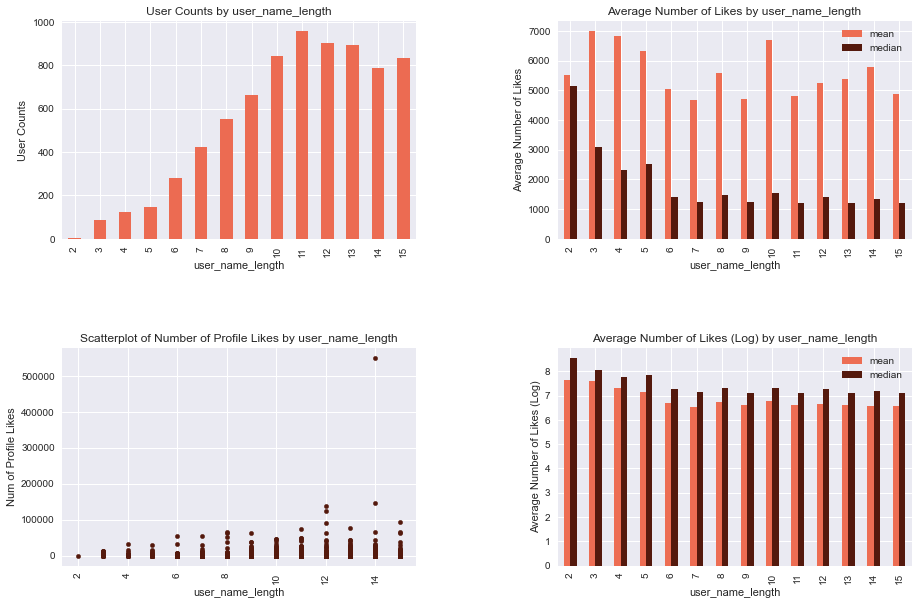

In [20]:
countsAndAverageLikesPlots('user_name_length', '#EC6B52', ['#ED6D53', '#54190D'])

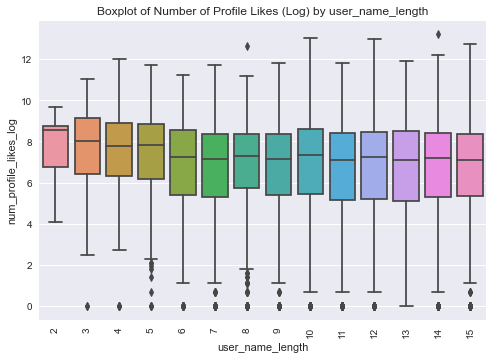

In [21]:
categoricalBoxplots('user_name_length')

In [22]:
df_train_clean.groupby('user_name_length')[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                              \
                                count    mean  median min     max   
user_name_length                                                    
2                                   6  5533.5  5144.5  59   15603   
3                                  85  6987.1  3106.0   0   62492   
4                                 122  6818.1  2333.5   0  162763   
5                                 149  6315.1  2535.0   0  124778   
6                                 279  5044.1  1410.0   0   76362   
7                                 425  4684.7  1253.0   0  120163   
8                                 554  5575.6  1478.0   0  314098   
9                                 663  4693.2  1238.0   0  137190   
10                                843  6696.5  1526.0   0  453991   
11                                957  4814.5  1208.0   0  134371   
12                                904  5239.5  1420.5   0  430248   
13                                893  5374.2  1204.0   0  151744   
14                                786  5782.3  1326.5   0  550594   
15                                834  4878.0  1216.5   0  340032   

                 num_profile_likes_log                         
                                 count mean median  min   max  
user_name_length                                               
2                                    6  7.6    8.5  4.1   9.7  
3                                   85  7.6    8.0  0.0  11.0  
4                                  122  7.3    7.8  0.0  12.0  
5                                  149  7.1    7.8  0.0  11.7  
6                                  279  6.7    7.3  0.0  11.2  
7                                  425  6.5    7.1  0.0  11.7  
8                                  554  6.7    7.3  0.0  12.7  
9                                  663  6.6    7.1  0.0  11.8  
10                                 843  6.8    7.3  0.0  13.0  
11                                 957  6.6    7.1  0.0  11.8  
12                                 904  6.7    7.3  0.0  13.0  
13                                 893  6.6    7.1  0.0  11.9  
14                                 786  6.6    7.2  0.0  13.2  
15                                 834  6.6    7.1  0.0  12.7

### Username Length Bins

- `1`: Median Number of Profile Likes (Log) < 7.5
- `2`: Median Number of Profile Likes (Log) >= 7.5

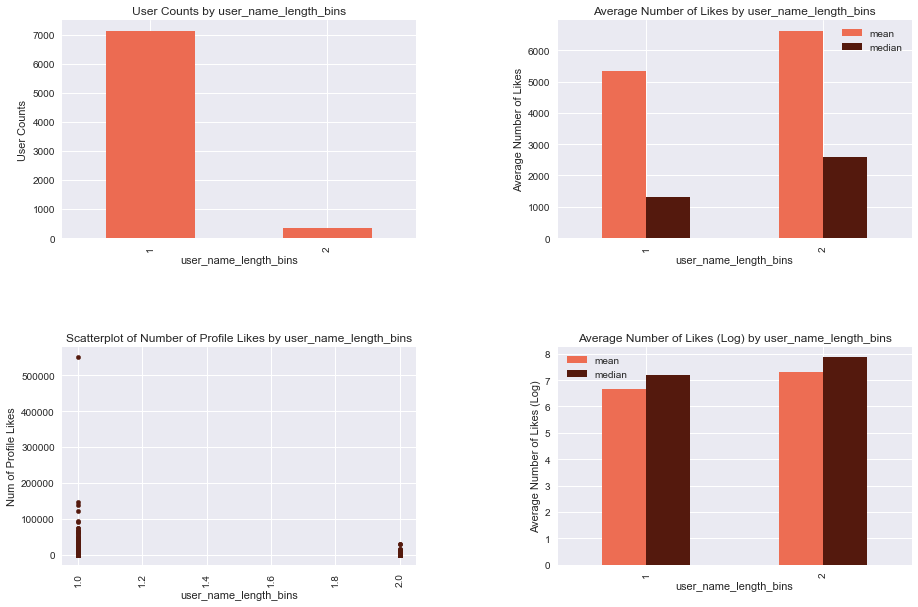

In [23]:
countsAndAverageLikesPlots('user_name_length_bins', '#EC6B52', ['#ED6D53', '#54190D'])

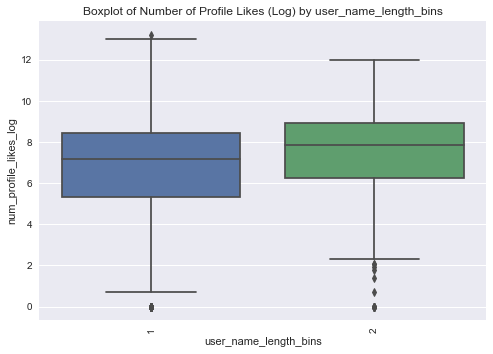

In [24]:
categoricalBoxplots('user_name_length_bins')

In [25]:
df_train_clean.groupby('user_name_length_bins')[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                              \
                                     count    mean  median min     max   
user_name_length_bins                                                    
1                                     7138  5323.7  1325.0   0  550594   
2                                      362  6629.4  2595.5   0  162763   

                      num_profile_likes_log                         
                                      count mean median  min   max  
user_name_length_bins                                               
1                                      7138  6.6    7.2  0.0  13.2  
2                                       362  7.3    7.9  0.0  12.0

### Personal URL

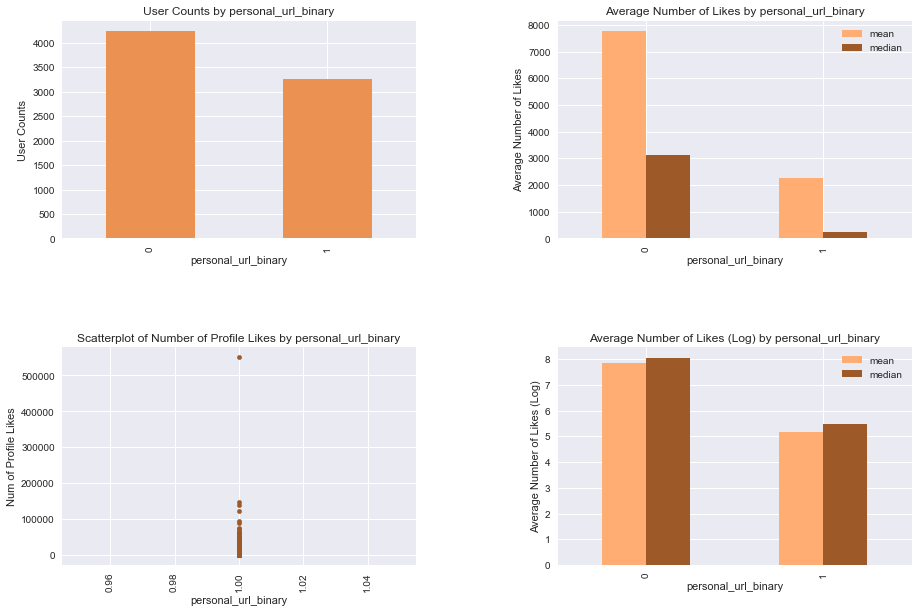

In [26]:
countsAndAverageLikesPlots('personal_url_binary', '#EB9252', ['#FFAD73', '#9E5928'])

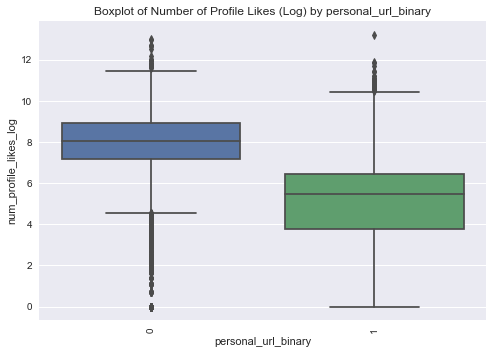

In [27]:
categoricalBoxplots('personal_url_binary')

In [28]:
df_train_clean.groupby('personal_url_binary')[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                             \
                                   count    mean median min     max   
personal_url_binary                                                   
0                                   4244  7771.7   3138   0  453991   
1                                   3256  2277.9    235   0  550594   

                    num_profile_likes_log                         
                                    count mean median  min   max  
personal_url_binary                                               
0                                    4244  7.8    8.1  0.0  13.0  
1                                    3256  5.2    5.5  0.0  13.2

### Profile Cover Image Status

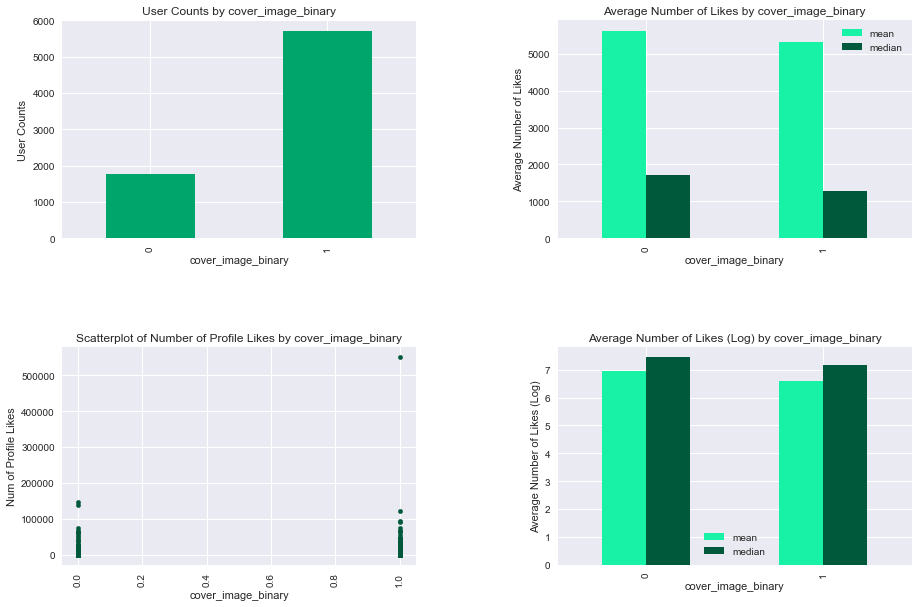

In [29]:
countsAndAverageLikesPlots('cover_image_binary', '#00A56B', ['#18F2A6', '#00593A'])

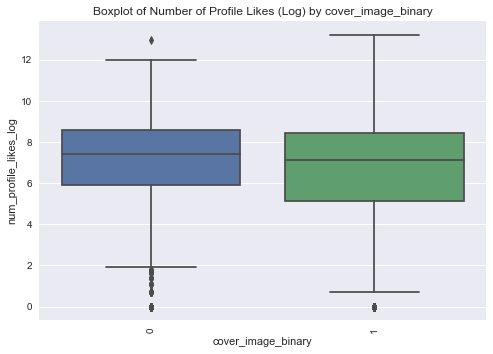

In [30]:
categoricalBoxplots('cover_image_binary')

In [31]:
df_train_clean.groupby('Profile Cover Image Status')[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                             \
                                          count    mean median min     max   
Profile Cover Image Status                                                   
Not set                                    1691  5683.6   1721   0  430248   
Set                                        5719  5311.9   1273   0  550594   

                           num_profile_likes_log                         
                                           count mean median  min   max  
Profile Cover Image Status                                               
Not set                                     1691  7.0    7.5  0.0  13.0  
Set                                         5719  6.6    7.1  0.0  13.2

### Profile Text Color

In [32]:
colors = sorted(list(df_train_clean['profile_text_color'].dropna().unique()))

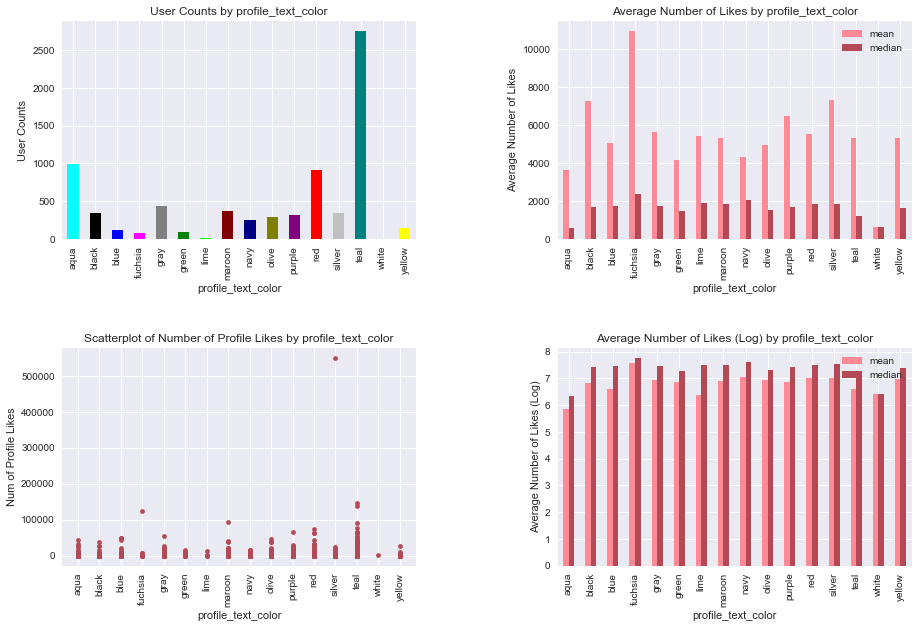

In [33]:
countsAndAverageLikesPlots('profile_text_color', colors, ['#FF8A95', '#B34954'])

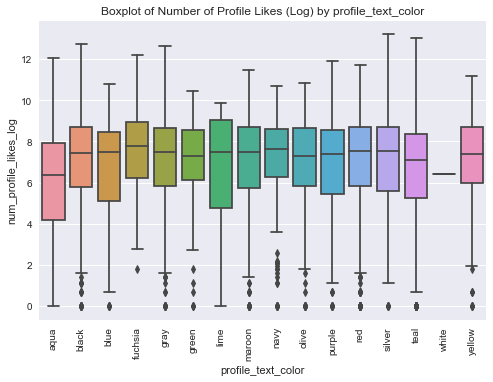

In [34]:
categoricalBoxplots('profile_text_color')

In [35]:
df_train_clean.groupby(['profile_text_color'])[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1).T

profile_text_color                aqua     black     blue   fuchsia      gray  \
Num of Profile Likes  count      987.0     342.0    113.0      75.0     431.0   
                      mean      3642.0    7276.7   5063.3   10928.7    5648.9   
                      median     577.0    1669.5   1743.0    2347.0    1741.0   
                      min          0.0       0.0      0.0       5.0       0.0   
                      max     173437.0  340032.0  48903.0  195625.0  314098.0   
num_profile_likes_log count      987.0     342.0    113.0      75.0     431.0   
                      mean         5.9       6.8      6.6       7.6       6.9   
                      median       6.4       7.4      7.5       7.8       7.5   
                      min          0.0       0.0      0.0       1.8       0.0   
                      max         12.1      12.7     10.8      12.2      12.7   

profile_text_color              green     lime   maroon     navy    olive  \
Num of Profile Likes  count      85.0      8.0    370.0    255.0    294.0   
                      mean     4176.7   5420.5   5318.6   4288.0   4951.1   
                      median   1465.0   1880.5   1823.5   2032.0   1501.0   
                      min         0.0      0.0      0.0      0.0      0.0   
                      max     33876.0  19715.0  94606.0  43353.0  50065.0   
num_profile_likes_log count      85.0      8.0    370.0    255.0    294.0   
                      mean        6.9      6.4      6.9      7.1      6.9   
                      median      7.3      7.5      7.5      7.6      7.3   
                      min         0.0      0.0      0.0      0.0      0.0   
                      max        10.4      9.9     11.5     10.7     10.8   

profile_text_color              purple       red    silver      teal  white  \
Num of Profile Likes  count      321.0     914.0     342.0    2751.0    1.0   
                      mean      6469.5    5530.3    7304.7    5324.3  620.0   
                      median    1655.0    1833.5    1855.0    1225.0  620.0   
                      min          0.0       0.0       0.0       0.0  620.0   
                      max     151744.0  124778.0  550594.0  453991.0  620.0   
num_profile_likes_log count      321.0     914.0     342.0    2751.0    1.0   
                      mean         6.9       7.0       7.0       6.6    6.4   
                      median       7.4       7.5       7.5       7.1    6.4   
                      min          0.0       0.0       0.0       0.0    6.4   
                      max         11.9      11.7      13.2      13.0    6.4   

profile_text_color             yellow  
Num of Profile Likes  count     145.0  
                      mean     5311.1  
                      median   1611.0  
                      min         0.0  
                      max     72141.0  
num_profile_likes_log count     145.0  
                      mean        7.0  
                      median      7.4  
                      min         0.0  
                      max        11.2

### Profile Page Color

In [36]:
colors = sorted(list(df_train_clean['profile_page_color'].dropna().unique()))

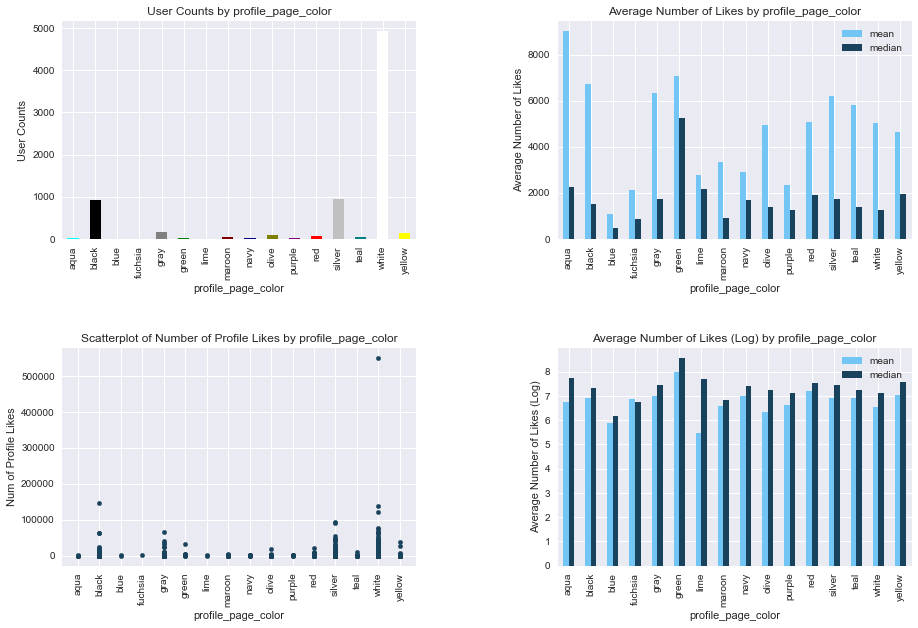

In [37]:
countsAndAverageLikesPlots('profile_page_color', colors, ['#73C5F5', '#19435C'])

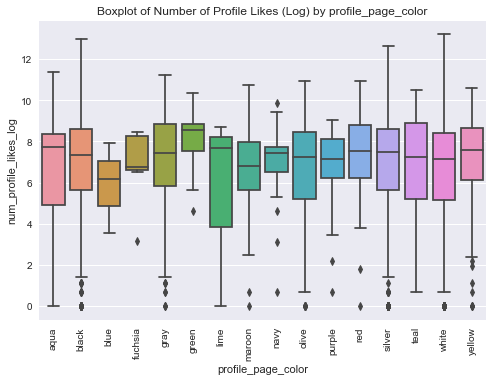

In [38]:
categoricalBoxplots('profile_page_color')

In [39]:
df_train_clean.groupby(['profile_page_color'])[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1).T

profile_page_color               aqua     black    blue  fuchsia     gray  \
Num of Profile Likes  count      24.0     923.0     3.0      7.0    169.0   
                      mean     9007.9    6742.1  1072.0   2127.7   6317.9   
                      median   2270.5    1511.0   471.0    861.0   1725.0   
                      min         0.0       0.0    34.0     23.0      0.0   
                      max     89171.0  430248.0  2711.0   4714.0  76362.0   
num_profile_likes_log count      24.0     923.0     3.0      7.0    169.0   
                      mean        6.7       6.9     5.9      6.9      7.0   
                      median      7.7       7.3     6.2      6.8      7.5   
                      min         0.0       0.0     3.6      3.2      0.0   
                      max        11.4      13.0     7.9      8.5     11.2   

profile_page_color              green    lime   maroon     navy    olive  \
Num of Profile Likes  count      13.0     3.0     45.0     29.0     87.0   
                      mean     7062.3  2776.7   3320.8   2882.1   4936.2   
                      median   5241.0  2178.0    923.0   1671.0   1379.0   
                      min       102.0     0.0      0.0      1.0      0.0   
                      max     32186.0  6152.0  46454.0  19025.0  57375.0   
num_profile_likes_log count      13.0     3.0     45.0     29.0     87.0   
                      mean        8.0     5.5      6.6      7.0      6.3   
                      median      8.6     7.7      6.8      7.4      7.2   
                      min         4.6     0.0      0.0      0.7      0.0   
                      max        10.4     8.7     10.7      9.9     11.0   

profile_page_color            purple      red    silver     teal     white  \
Num of Profile Likes  count     18.0     62.0     942.0     37.0    4925.0   
                      mean    2334.3   5092.0    6192.8   5801.7    5017.2   
                      median  1256.0   1887.5    1746.5   1383.0    1252.0   
                      min        1.0      0.0       0.0      1.0       0.0   
                      max     8434.0  56997.0  317077.0  36876.0  550594.0   
num_profile_likes_log count     18.0     62.0     942.0     37.0    4925.0   
                      mean       6.6      7.2       6.9      6.9       6.5   
                      median     7.1      7.5       7.5      7.2       7.1   
                      min        0.7      0.0       0.0      0.7       0.0   
                      max        9.0     11.0      12.7     10.5      13.2   

profile_page_color             yellow  
Num of Profile Likes  count     135.0  
                      mean     4633.6  
                      median   1937.0  
                      min         0.0  
                      max     39207.0  
num_profile_likes_log count     135.0  
                      mean        7.0  
                      median      7.6  
                      min         0.0  
                      max        10.6

### Profile Theme Color

In [40]:
colors = sorted(list(df_train_clean['profile_theme_color'].dropna().unique()))

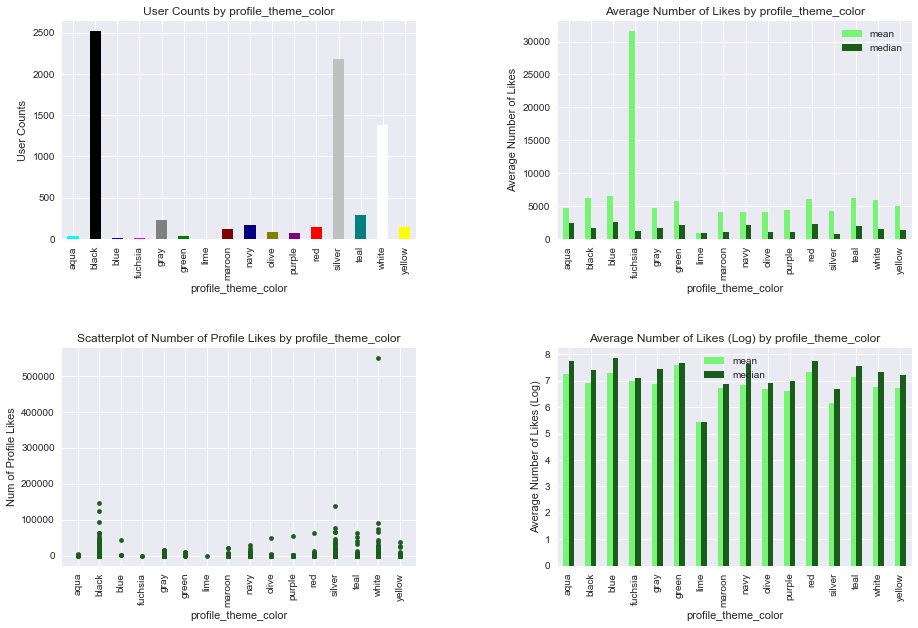

In [41]:
countsAndAverageLikesPlots('profile_theme_color', colors, ['#75F573', '#1A5C19'])

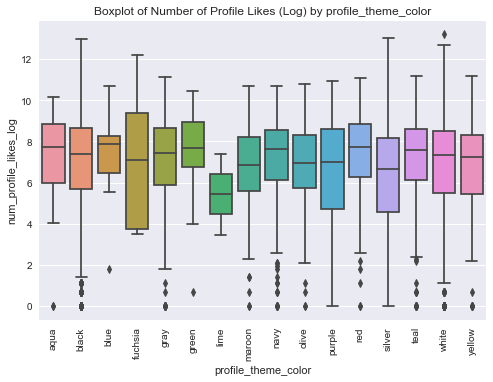

In [42]:
categoricalBoxplots('profile_theme_color')

In [43]:
df_train_clean.groupby(['profile_theme_color'])[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1).T

profile_theme_color              aqua     black     blue   fuchsia     gray  \
Num of Profile Likes  count      38.0    2515.0     13.0       7.0    234.0   
                      mean     4721.2    6271.5   6461.9   31558.7   4654.5   
                      median   2328.5    1644.0   2587.0    1230.0   1692.5   
                      min         0.0       0.0      5.0      32.0      0.0   
                      max     25684.0  430248.0  44487.0  195625.0  68996.0   
num_profile_likes_log count      38.0    2515.0     13.0       7.0    234.0   
                      mean        7.3       6.9      7.3       7.0      6.9   
                      median      7.8       7.4      7.9       7.1      7.4   
                      min         0.0       0.0      1.8       3.5      0.0   
                      max        10.2      13.0     10.7      12.2     11.1   

profile_theme_color             green    lime   maroon     navy    olive  \
Num of Profile Likes  count      39.0     2.0    115.0    172.0     78.0   
                      mean     5779.0   841.5   4046.4   4085.4   4084.8   
                      median   2172.0   841.5    959.0   2056.0   1026.0   
                      min         1.0    31.0      0.0      0.0      0.0   
                      max     33876.0  1652.0  44019.0  44596.0  47680.0   
num_profile_likes_log count      39.0     2.0    115.0    172.0     78.0   
                      mean        7.6     5.4      6.7      6.8      6.7   
                      median      7.7     5.4      6.9      7.6      6.9   
                      min         0.7     3.5      0.0      0.0      0.0   
                      max        10.4     7.4     10.7     10.7     10.8   

profile_theme_color            purple      red    silver     teal     white  \
Num of Profile Likes  count      76.0    138.0    2183.0    293.0    1385.0   
                      mean     4446.5   6067.0    4206.6   6195.9    5904.3   
                      median   1072.0   2299.0     789.0   1916.0    1517.0   
                      min         0.0      0.0       0.0      0.0       0.0   
                      max     55002.0  64087.0  453991.0  72512.0  550594.0   
num_profile_likes_log count      76.0    138.0    2183.0    293.0    1385.0   
                      mean        6.6      7.3       6.2      7.1       6.8   
                      median      7.0      7.7       6.7      7.6       7.3   
                      min         0.0      0.0       0.0      0.0       0.0   
                      max        10.9     11.1      13.0     11.2      13.2   

profile_theme_color            yellow  
Num of Profile Likes  count     140.0  
                      mean     4997.3  
                      median   1379.0  
                      min         0.0  
                      max     72141.0  
num_profile_likes_log count     140.0  
                      mean        6.7  
                      median      7.2  
                      min         0.0  
                      max        11.2

### Profile Verification Status

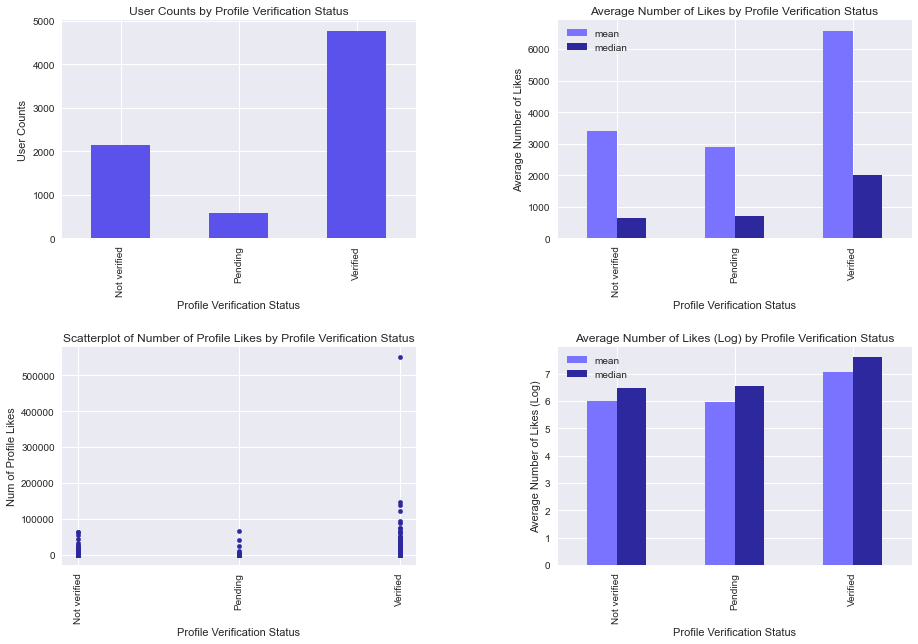

In [44]:
countsAndAverageLikesPlots('Profile Verification Status', '#5A52EB', ['#7A73FF', '#2D289E'])

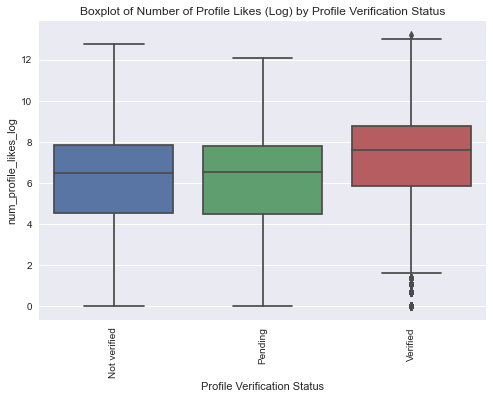

In [45]:
categoricalBoxplots('Profile Verification Status')

In [46]:
df_train_clean.groupby('Profile Verification Status')[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                             \
                                           count    mean median min     max   
Profile Verification Status                                                   
Not verified                                2146  3400.0    647   0  340032   
Pending                                      583  2910.6    692   0  173437   
Verified                                    4771  6582.9   1991   0  550594   

                            num_profile_likes_log                         
                                            count mean median  min   max  
Profile Verification Status                                               
Not verified                                 2146  6.0    6.5  0.0  12.7  
Pending                                       583  6.0    6.5  0.0  12.1  
Verified                                     4771  7.1    7.6  0.0  13.2

### Is Profile View Size Customized?

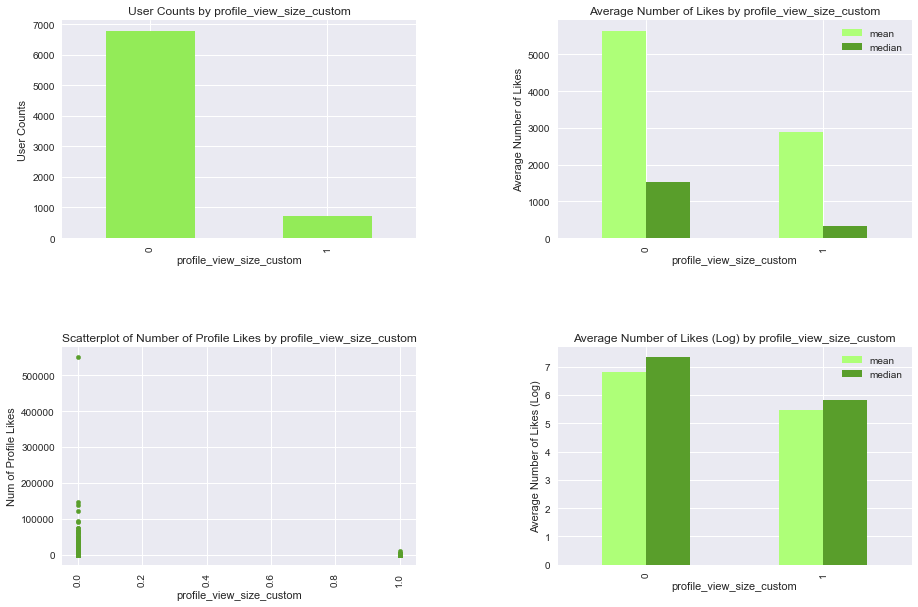

In [47]:
countsAndAverageLikesPlots('profile_view_size_custom', '#93EB58', ['#AEFF78', '#599E2B'])

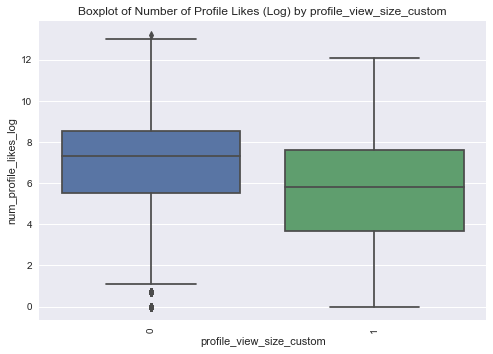

In [48]:
categoricalBoxplots('profile_view_size_custom')

In [49]:
df_train_clean.groupby('profile_view_size_custom')[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                             \
                                        count    mean median min     max   
profile_view_size_custom                                                   
0                                        6785  5649.5   1525   0  550594   
1                                         715  2892.3    331   0  173437   

                         num_profile_likes_log                         
                                         count mean median  min   max  
profile_view_size_custom                                               
0                                         6785  6.8    7.3  0.0  13.2  
1                                          715  5.5    5.8  0.0  12.1

### UTC Offset

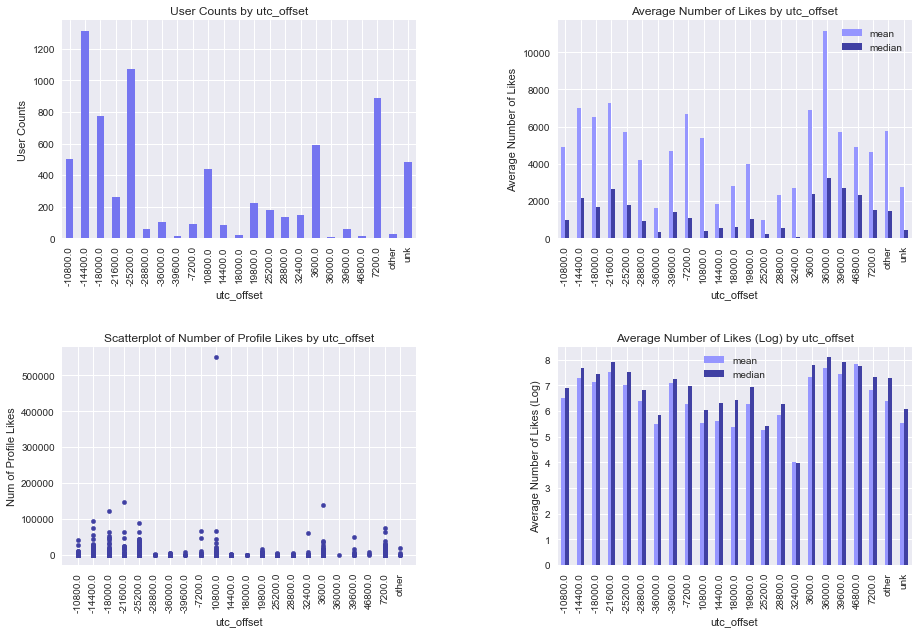

In [50]:
countsAndAverageLikesPlots('utc_offset', '#7575F0', ['#9696FF', '#4040A3'])

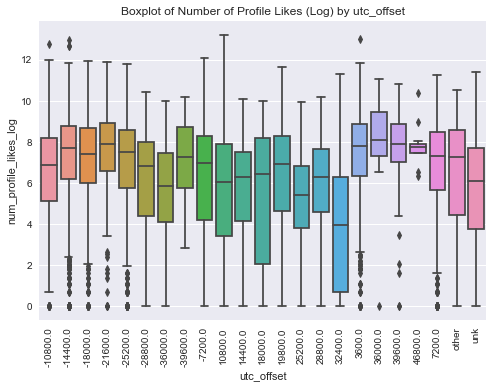

In [51]:
categoricalBoxplots('utc_offset')

In [52]:
df_train_clean.groupby('utc_offset')[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                                \
                          count     mean  median  min     max   
utc_offset                                                      
-10800.0                    504   4928.4   976.0    0  340032   
-14400.0                   1314   6997.1  2178.5    0  430248   
-18000.0                    774   6509.8  1676.0    0  154619   
-21600.0                    261   7275.2  2663.0    0  147382   
-25200.0                   1072   5696.3  1813.0    0  134371   
-28800.0                     60   4196.8   926.5    0   33876   
-36000.0                    103   1627.3   341.0    0   21645   
-39600.0                     17   4717.9  1397.0   16   26021   
-7200.0                      91   6696.1  1081.0    0  173437   
10800.0                     439   5365.5   415.0    0  550594   
14400.0                      82   1840.6   550.0    0   24466   
18000.0                      23   2801.4   625.0    0   21338   
19800.0                     221   3987.0  1025.0    0  114762   
25200.0                     178    997.5   224.5    0   20775   
28800.0                     135   2305.8   527.0    0   26729   
32400.0                     149   2722.0    52.0    0   79787   
3600.0                      593   6915.1  2376.0    0  453991   
36000.0                      10  11156.1  3230.0    0   62492   
39600.0                      61   5703.1  2697.0    0   50403   
46800.0                      12   4914.6  2308.5  562   31671   
7200.0                      890   4619.6  1509.5    0   76362   
other                        25   5762.5  1460.0    0   36498   
unk                         486   2774.1   440.0    0   88724   

           num_profile_likes_log                         
                           count mean median  min   max  
utc_offset                                               
-10800.0                     504  6.5    6.9  0.0  12.7  
-14400.0                    1314  7.3    7.7  0.0  13.0  
-18000.0                     774  7.1    7.4  0.0  11.9  
-21600.0                     261  7.5    7.9  0.0  11.9  
-25200.0                    1072  7.0    7.5  0.0  11.8  
-28800.0                      60  6.4    6.8  0.0  10.4  
-36000.0                     103  5.5    5.8  0.0  10.0  
-39600.0                      17  7.1    7.2  2.8  10.2  
-7200.0                       91  6.3    7.0  0.0  12.1  
10800.0                      439  5.5    6.0  0.0  13.2  
14400.0                       82  5.6    6.3  0.0  10.1  
18000.0                       23  5.4    6.4  0.0  10.0  
19800.0                      221  6.3    6.9  0.0  11.7  
25200.0                      178  5.2    5.4  0.0   9.9  
28800.0                      135  5.8    6.3  0.0  10.2  
32400.0                      149  4.0    4.0  0.0  11.3  
3600.0                       593  7.3    7.8  0.0  13.0  
36000.0                       10  7.7    8.1  0.0  11.0  
39600.0                       61  7.4    7.9  0.0  10.8  
46800.0                       12  7.8    7.7  6.3  10.4  
7200.0                       890  6.8    7.3  0.0  11.2  
other                         25  6.4    7.3  0.0  10.5  
unk                          486  5.5    6.1  0.0  11.4

### UTC Offset Bins

- `1`: Median Number of Profile Likes (Log) < 5
- `2`: Median Number of Profile Likes (Log) < 6
- `3`: Median Number of Profile Likes (Log) < 7
- `4`: Median Number of Profile Likes (Log) >= 7

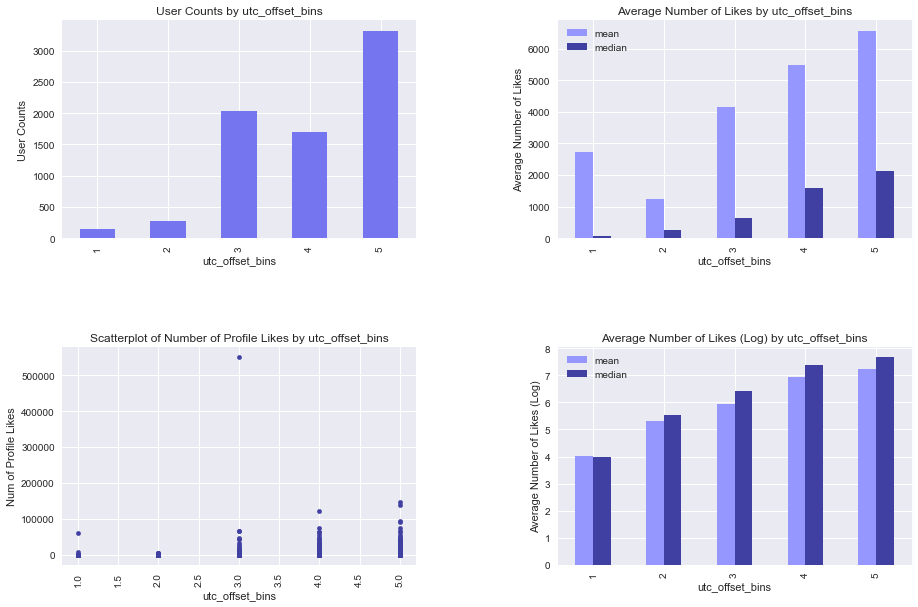

In [53]:
countsAndAverageLikesPlots('utc_offset_bins', '#7575F0', ['#9696FF', '#4040A3'])

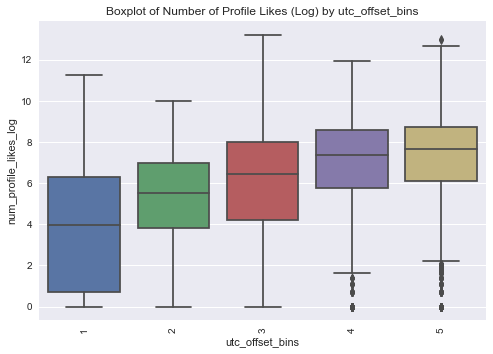

In [54]:
categoricalBoxplots('utc_offset_bins')

### User Timezone

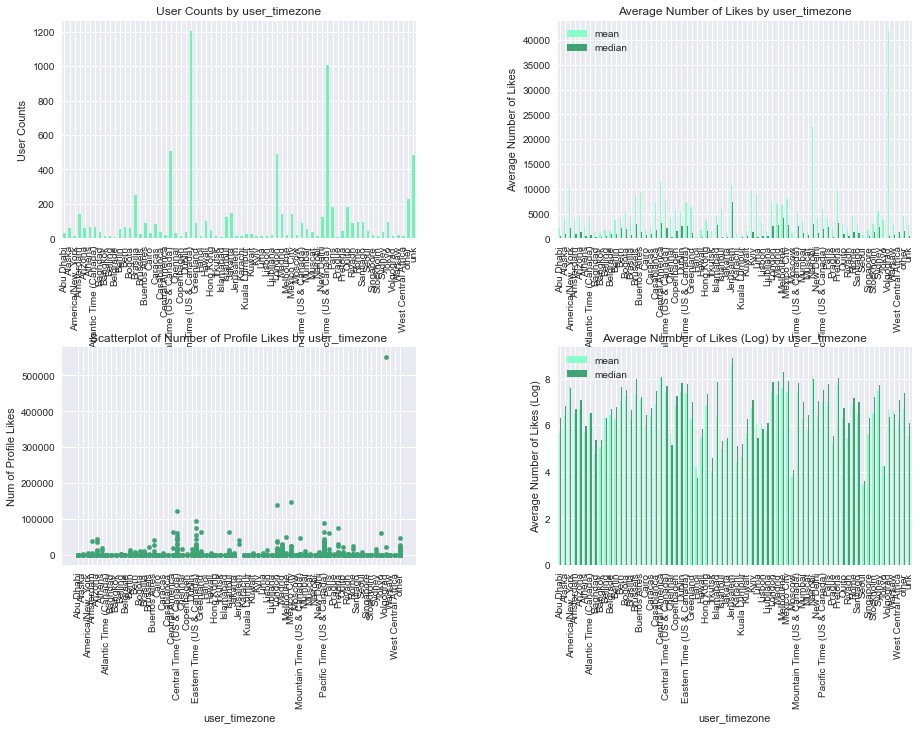

In [55]:
countsAndAverageLikesPlots('user_timezone', '#75F0B7', ['#88FFC8', '#40A375'])

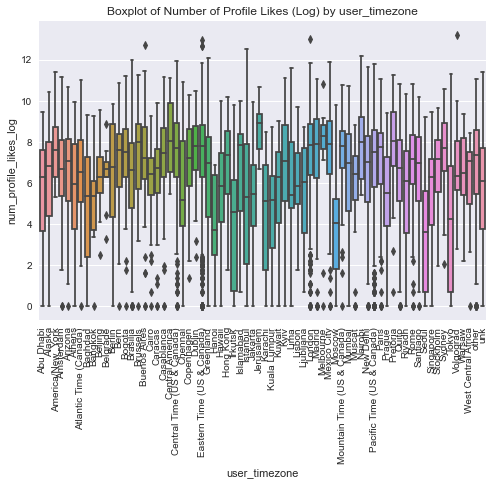

In [56]:
categoricalBoxplots('user_timezone')

### Location Clean Bins

- `1`: Median Number of Profile Likes (Log) < 4.5
- `2`: Median Number of Profile Likes (Log) < 5.5
- `3`: Median Number of Profile Likes (Log) < 6.5
- `4`: Median Number of Profile Likes (Log) < 7.5
- `5`: Median Number of Profile Likes (Log) < 8.5
- `6`: Median Number of Profile Likes (Log) < 9.5
- `7`: Median Number of Profile Likes (Log) < 10.5
- `8`: Median Number of Profile Likes (Log) >= 10.5

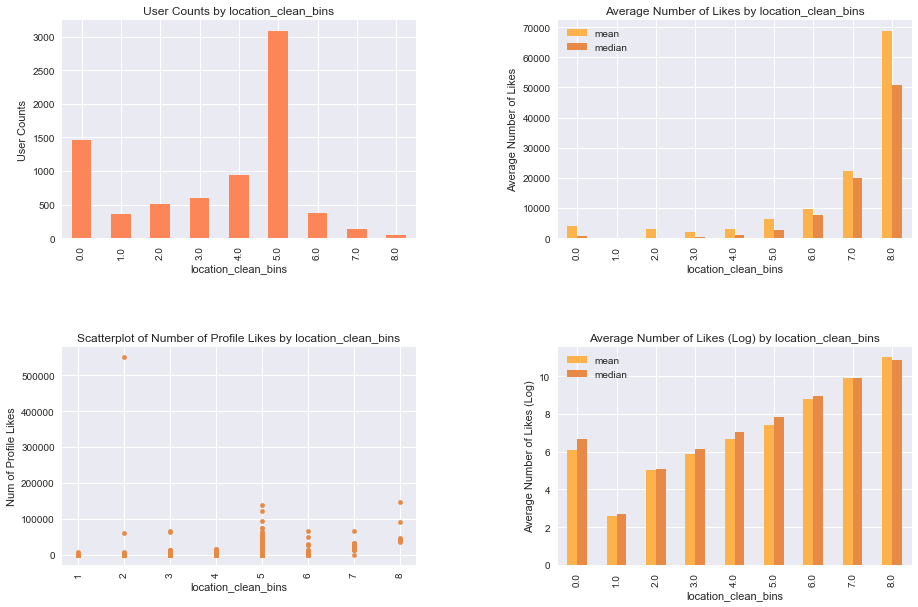

In [58]:
countsAndAverageLikesPlots('location_clean_bins', '#FD8658', ['#FEB24C', '#E68A45'])

### User Timezone Bins

- `1`: Median Number of Profile Likes (Log) < 4
- `2`: Median Number of Profile Likes (Log) < 5
- `3`: Median Number of Profile Likes (Log) < 6
- `4`: Median Number of Profile Likes (Log) < 7
- `5`: Median Number of Profile Likes (Log) < 8
- `6`: Median Number of Profile Likes (Log) >= 8

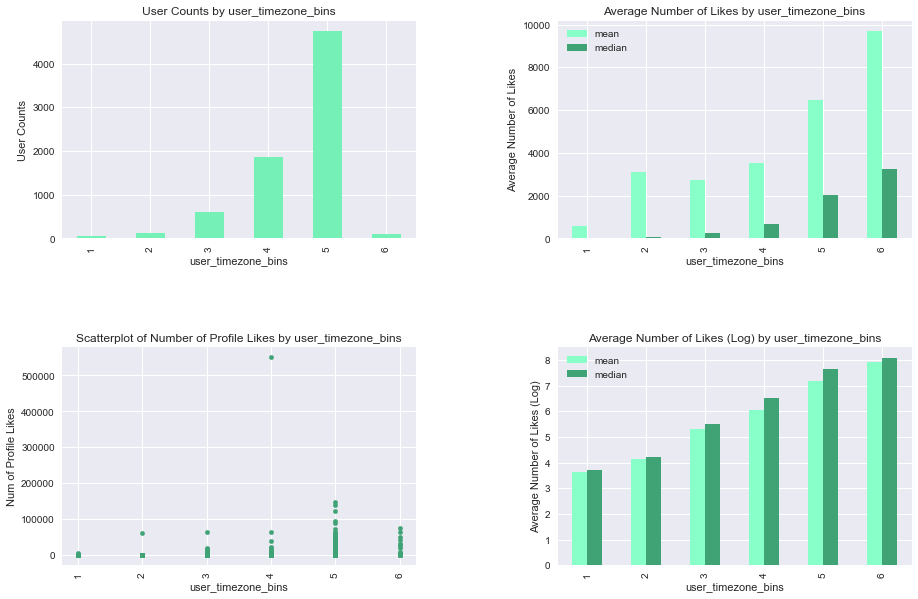

In [59]:
countsAndAverageLikesPlots('user_timezone_bins', '#75F0B7', ['#88FFC8', '#40A375'])

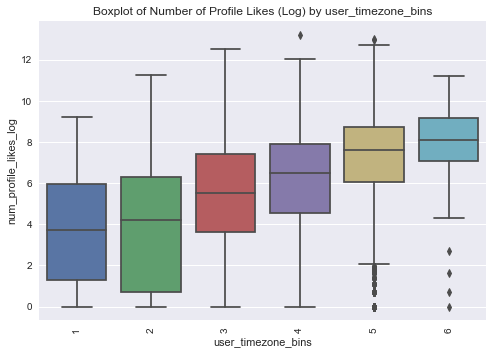

In [60]:
categoricalBoxplots('user_timezone_bins')

### Location - Binary

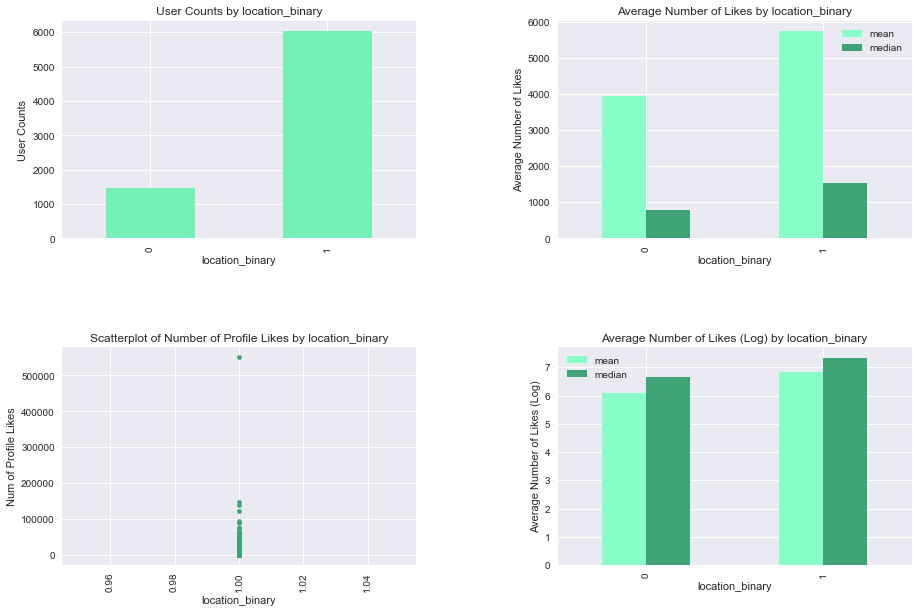

In [61]:
countsAndAverageLikesPlots('location_binary', '#75F0B7', ['#88FFC8', '#40A375'])

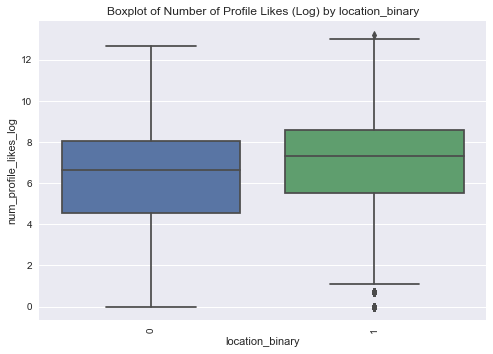

In [62]:
categoricalBoxplots('location_binary')

In [63]:
df_train_clean.groupby('location_binary')[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                             \
                               count    mean median min     max   
location_binary                                                   
0                               1461  3931.6    781   0  314098   
1                               6039  5738.7   1538   0  550594   

                num_profile_likes_log                         
                                count mean median  min   max  
location_binary                                               
0                                1461  6.1    6.7  0.0  12.7  
1                                6039  6.8    7.3  0.0  13.2

### Location Public Visibility

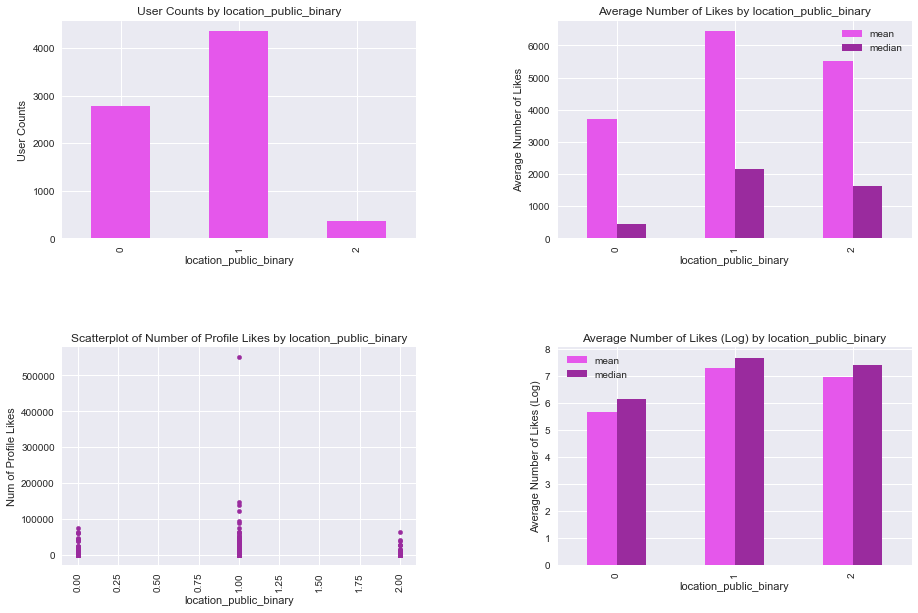

In [64]:
countsAndAverageLikesPlots('location_public_binary', '#E557EB', ['#E557EB', '#9A2B9E'])

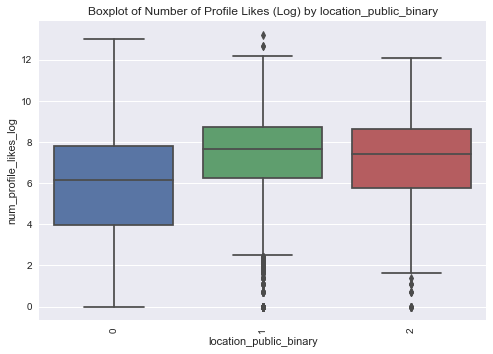

In [65]:
categoricalBoxplots('location_public_binary')

In [66]:
df_train_clean.groupby('location_public_binary')[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                             \
                                      count    mean median min     max   
location_public_binary                                                   
0                                      2773  3699.3    464   0  453991   
1                                      4355  6448.8   2160   0  550594   
2                                       372  5530.3   1628   0  173437   

                       num_profile_likes_log                         
                                       count mean median  min   max  
location_public_binary                                               
0                                       2773  5.7    6.1  0.0  13.0  
1                                       4355  7.3    7.7  0.0  13.2  
2                                        372  7.0    7.4  0.0  12.1

### User Language

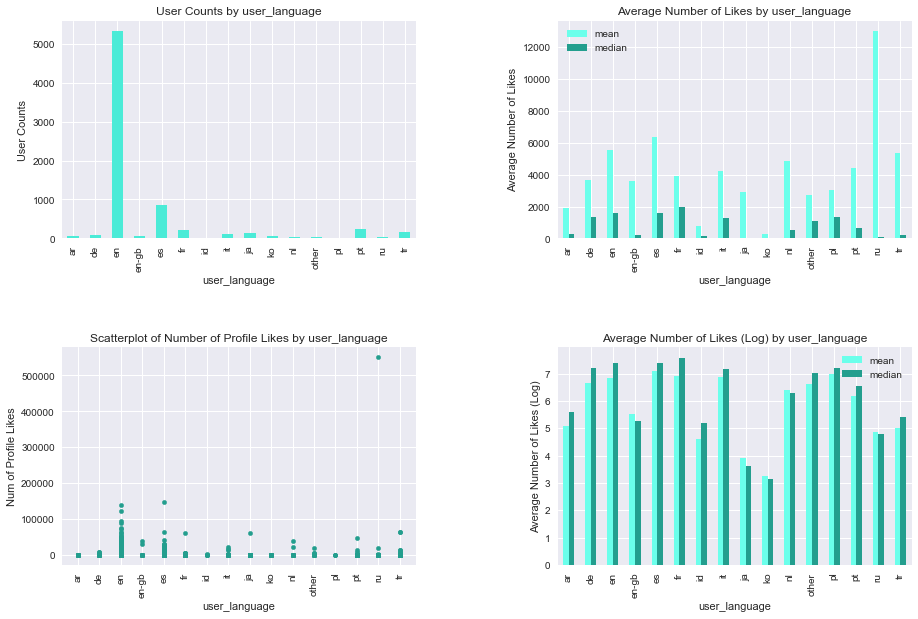

In [67]:
countsAndAverageLikesPlots('user_language', '#4BEBD7', ['#6BFFEB', '#239E8E'])

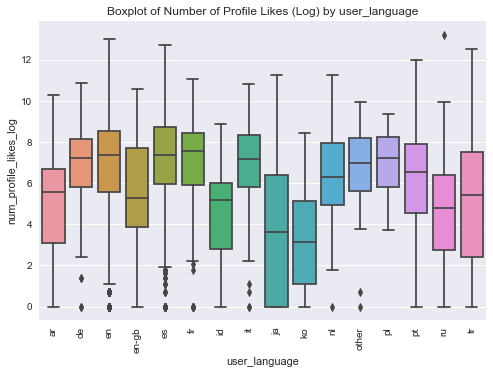

In [68]:
categoricalBoxplots('user_language')

In [69]:
df_train_clean.groupby('user_language')[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                               \
                             count     mean  median min     max   
user_language                                                     
ar                              58   1898.9   263.5   0   30040   
de                              84   3639.1  1356.5   0   51586   
en                            5321   5537.1  1582.0   0  453991   
en-gb                           62   3611.3   196.0   0   38855   
es                             869   6362.7  1624.0   0  340032   
fr                             223   3915.2  1949.0   0   62713   
id                              19    812.0   178.0   0    7290   
it                             115   4204.8  1291.0   0   50804   
ja                             129   2935.6    37.0   0   79787   
ko                              56    254.4    22.5   0    4626   
nl                              48   4889.0   537.5   0   76362   
other                           40   2757.2  1098.0   0   21171   
pl                              15   3067.3  1345.0  41   11722   
pt                             255   4432.8   682.0   0  162763   
ru                              49  13007.6   121.0   0  550594   
tr                             157   5380.1   226.0   0  276352   

              num_profile_likes_log                         
                              count mean median  min   max  
user_language                                               
ar                               58  5.1    5.6  0.0  10.3  
de                               84  6.7    7.2  0.0  10.9  
en                             5321  6.8    7.4  0.0  13.0  
en-gb                            62  5.5    5.3  0.0  10.6  
es                              869  7.1    7.4  0.0  12.7  
fr                              223  6.9    7.6  0.0  11.0  
id                               19  4.6    5.2  0.0   8.9  
it                              115  6.9    7.2  0.0  10.8  
ja                              129  3.9    3.6  0.0  11.3  
ko                               56  3.2    3.1  0.0   8.4  
nl                               48  6.4    6.3  0.0  11.2  
other                            40  6.6    7.0  0.0  10.0  
pl                               15  7.0    7.2  3.7   9.4  
pt                              255  6.2    6.5  0.0  12.0  
ru                               49  4.9    4.8  0.0  13.2  
tr                              157  5.0    5.4  0.0  12.5

### User Language Bins

- `1`: Median Number of Profile Likes (Log) < 4
- `2`: Median Number of Profile Likes (Log) < 5
- `3`: Median Number of Profile Likes (Log) < 6
- `4`: Median Number of Profile Likes (Log) < 7
- `5`: Median Number of Profile Likes (Log) >= 7

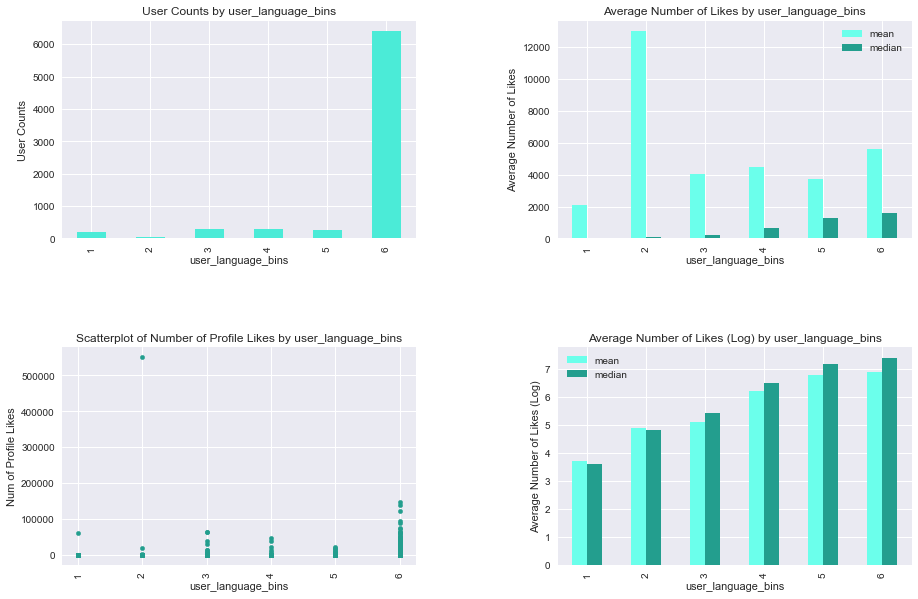

In [70]:
countsAndAverageLikesPlots('user_language_bins', '#4BEBD7', ['#6BFFEB', '#239E8E'])

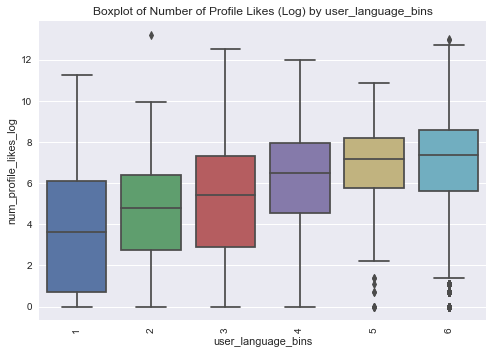

In [71]:
categoricalBoxplots('user_language_bins')

### Profile Creation Year

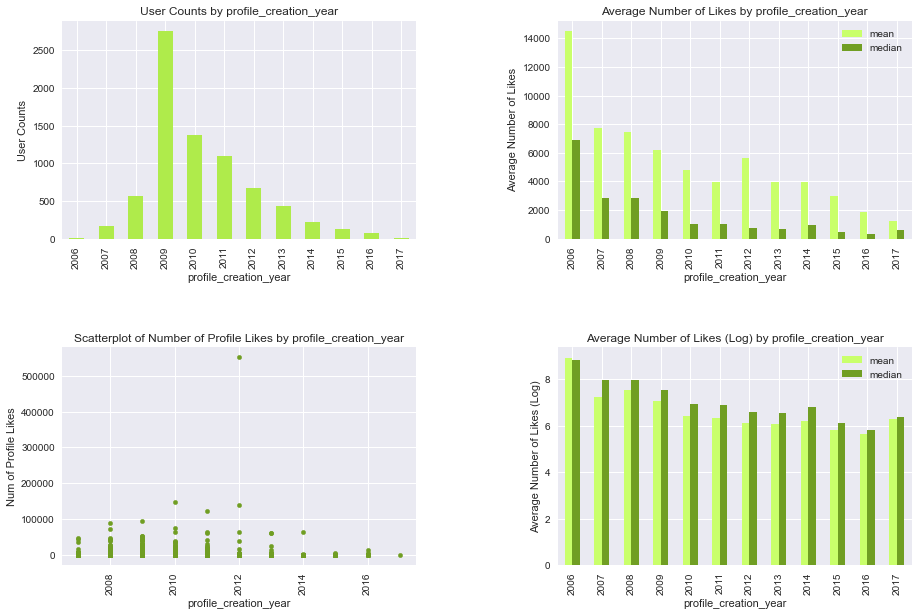

In [72]:
countsAndAverageLikesPlots('profile_creation_year', '#AFEB4B', ['#C9FF6B', '#709E23'])

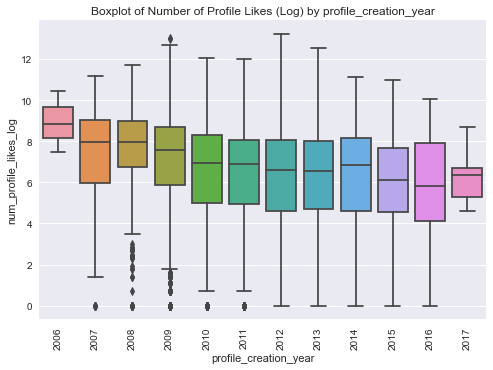

In [73]:
categoricalBoxplots('profile_creation_year')

In [74]:
df_train_clean.groupby(df_train_clean['profile_creation_year'].fillna('unk'))[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                                 \
                                     count     mean  median   min     max   
profile_creation_year                                                       
2006                                     3  14516.0  6870.0  1743   34935   
2007                                   163   7754.3  2852.0     0   72141   
2008                                   564   7471.7  2845.5     0  120163   
2009                                  2756   6173.1  1911.5     0  453991   
2010                                  1382   4793.3  1012.0     0  173437   
2011                                  1093   3939.5   999.0     0  162763   
2012                                   672   5672.0   728.5     0  550594   
2013                                   428   3943.0   686.0     0  276352   
2014                                   226   3963.7   915.0     0   69187   
2015                                   133   3002.1   452.0     0   57149   
2016                                    71   1833.9   340.0     0   23633   
2017                                     9   1196.7   580.0    98    5829   

                      num_profile_likes_log                         
                                      count mean median  min   max  
profile_creation_year                                               
2006                                      3  8.9    8.8  7.5  10.5  
2007                                    163  7.3    8.0  0.0  11.2  
2008                                    564  7.6    8.0  0.0  11.7  
2009                                   2756  7.1    7.6  0.0  13.0  
2010                                   1382  6.4    6.9  0.0  12.1  
2011                                   1093  6.3    6.9  0.0  12.0  
2012                                    672  6.1    6.6  0.0  13.2  
2013                                    428  6.1    6.5  0.0  12.5  
2014                                    226  6.2    6.8  0.0  11.1  
2015                                    133  5.8    6.1  0.0  11.0  
2016                                     71  5.6    5.8  0.0  10.1  
2017                                      9  6.3    6.4  4.6   8.7

### Profile Creation Month

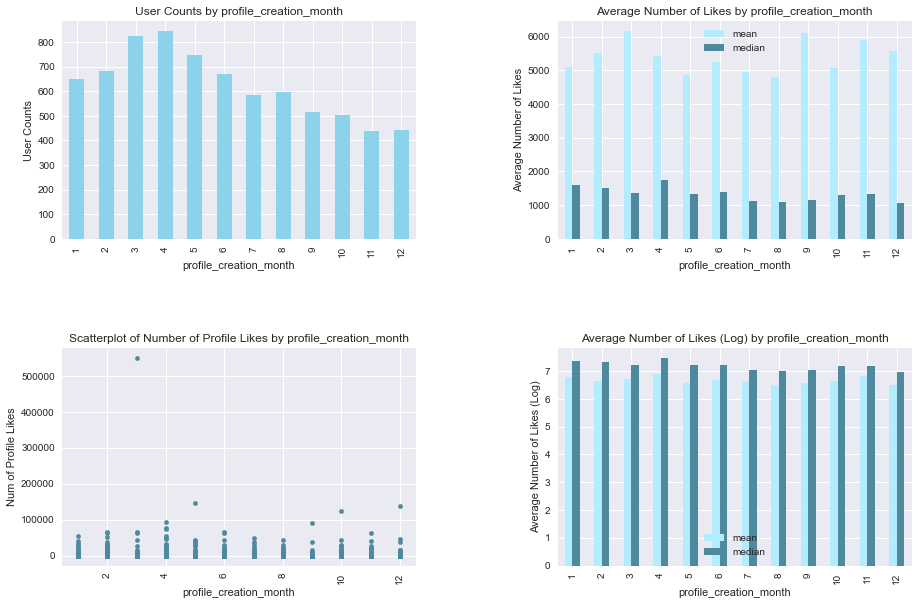

In [75]:
countsAndAverageLikesPlots('profile_creation_month', '#8DD2EB', ['#B3EBFF', '#4F899E'])

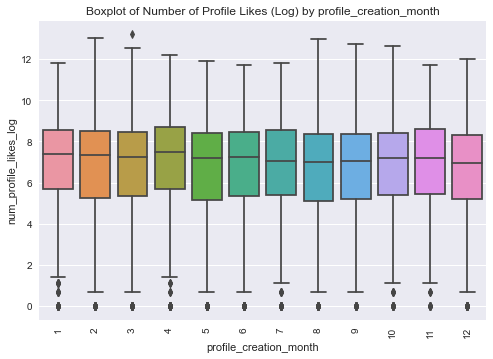

In [76]:
categoricalBoxplots('profile_creation_month')

### Profile Creation Day

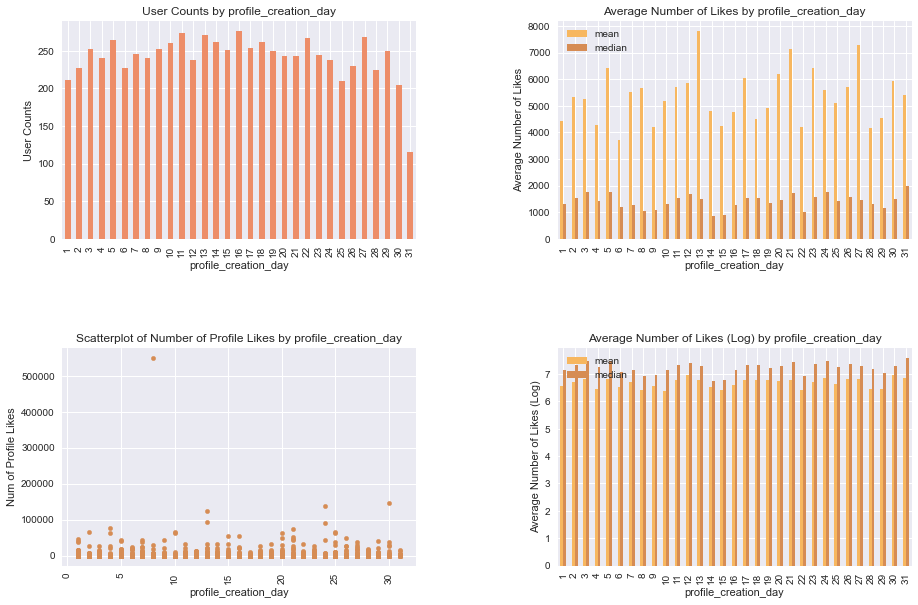

In [77]:
countsAndAverageLikesPlots('profile_creation_day', '#ED8D68', ['#F7B760', '#D68C54'])

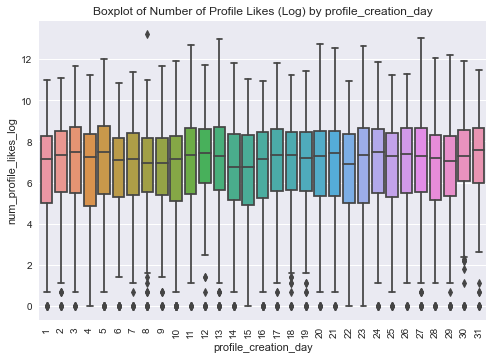

In [78]:
categoricalBoxplots('profile_creation_day')

In [79]:
df_train_clean.groupby(df_train_clean['profile_creation_day'].fillna('unk'))[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                              \
                                    count    mean  median min     max   
profile_creation_day                                                    
1                                     211  4435.8  1295.0   0   59930   
2                                     227  5336.4  1534.0   0   65342   
3                                     253  5259.2  1771.0   0  114842   
4                                     241  4287.1  1409.0   0   75727   
5                                     265  6436.1  1758.0   0  162763   
6                                     227  3714.6  1204.0   0   51259   
7                                     246  5531.6  1261.5   0   88724   
8                                     241  5676.8  1031.0   0  550594   
9                                     253  4220.8  1065.0   0  114762   
10                                    261  5183.0  1292.0   0  151744   
11                                    274  5707.0  1550.0   0  317077   
12                                    238  5864.3  1670.0   0  120163   
13                                    271  7803.5  1497.0   0  430248   
14                                    262  4806.7   860.5   0  134371   
15                                    251  4239.9   877.0   0   61837   
16                                    276  4767.7  1253.0   0   55002   
17                                    254  6049.6  1532.0   0  137190   
18                                    262  4519.5  1537.5   0   75779   
19                                    250  4929.2  1359.5   0   91131   
20                                    243  6214.1  1460.0   0  340032   
21                                    243  7150.5  1720.0   0  276352   
22                                    267  4205.8  1015.0   0   56997   
23                                    244  6415.7  1560.5   0  314098   
24                                    238  5595.1  1745.0   0  139148   
25                                    210  5113.4  1438.0   0   76362   
26                                    230  5696.0  1587.5   0   79787   
27                                    268  7307.1  1452.0   0  453991   
28                                    224  4187.1  1318.5   0  173437   
29                                    250  4536.0  1145.0   0  195625   
30                                    204  5954.0  1499.0   0  147382   
31                                    116  5411.8  1970.0   0   95139   

                     num_profile_likes_log                         
                                     count mean median  min   max  
profile_creation_day                                               
1                                      211  6.6    7.2  0.0  11.0  
2                                      227  6.7    7.3  0.0  11.1  
3                                      253  6.8    7.5  0.0  11.7  
4                                      241  6.5    7.3  0.0  11.2  
5                                      265  6.8    7.5  0.0  12.0  
6                                      227  6.5    7.1  0.0  10.8  
7                                      246  6.7    7.1  0.0  11.4  
8                                      241  6.4    6.9  0.0  13.2  
9                                      253  6.6    7.0  0.0  11.7  
10                                     261  6.4    7.2  0.0  11.9  
11                                     274  6.8    7.3  0.0  12.7  
12                                     238  7.0    7.4  0.0  11.7  
13                                     271  6.8    7.3  0.0  13.0  
14                                     262  6.5    6.8  0.0  11.8  
15                                     251  6.4    6.8  0.0  11.0  
16                                     276  6.6    7.1  0.0  10.9  
17                                     254  6.8    7.3  0.0  11.8  
18                                     262  6.8    7.3  0.0  11.2  
19                                     250  6.8    7.2  0.0  11.4  
20                                     243

### Profile Category

In [80]:
df_train_clean.loc[df_train_clean['Profile Image'] == 'TQAO700I9M14B559.png', ['Profile Image', 'image_hex_color', 'image_html_color']].sort_values('Profile Image')

,Profile Image,image_hex_color,image_html_color
5525,TQAO700I9M14B559.png,#4da258,mediumseagreen


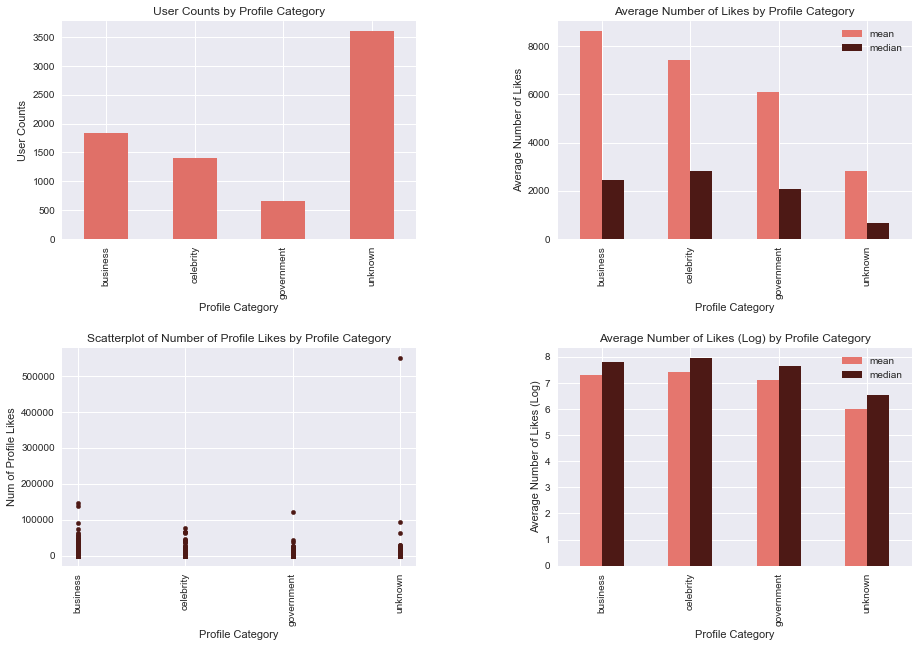

In [81]:
countsAndAverageLikesPlots('Profile Category', '#E07068', ['#E5766E', '#4D1915'])

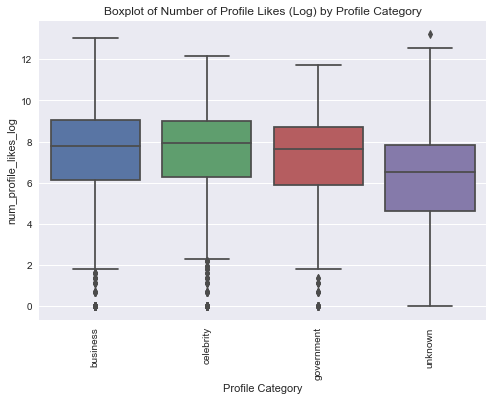

In [82]:
categoricalBoxplots('Profile Category')

In [83]:
df_train_clean.groupby(df_train['Profile Category'].fillna('unk'))[['Num of Profile Likes', 'num_profile_likes_log']].agg(agg_stats).round(1)

Num of Profile Likes                              \
                                count    mean  median min     max   
Profile Category                                                    
                                  240  4587.3  1323.5   0  110907   
business                         1839  8605.2  2427.0   0  453991   
celebrity                        1401  7406.3  2823.0   0  195625   
government                        660  6082.4  2065.5   0  124778   
unknown                          3360  2703.5   643.0   0  550594   

                 num_profile_likes_log                         
                                 count mean median  min   max  
Profile Category                                               
                                   240  6.8    7.2  0.0  11.6  
business                          1839  7.3    7.8  0.0  13.0  
celebrity                         1401  7.4    7.9  0.0  12.2  
government                         660  7.1    7.6  0.0  11.7  
unknown                           3360  5.9    6.5  0.0  13.2

### Profile Image Color

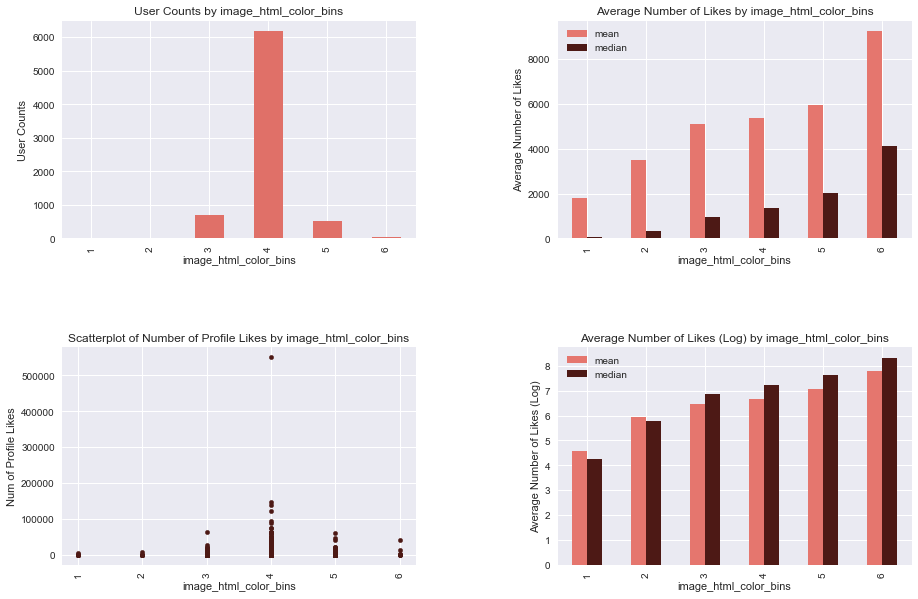

In [84]:
countsAndAverageLikesPlots('image_html_color_bins', '#E07068', ['#E5766E', '#4D1915'])

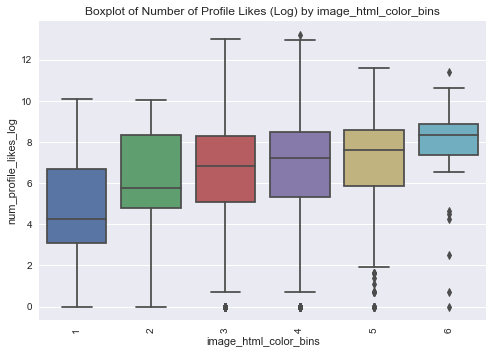

In [85]:
categoricalBoxplots('image_html_color_bins')

## Data Visualization - Numerical Values

In [86]:
def histogramAndBoxplot(var_name, color):
    """Function plots the histogram and boxplots for different numerical variables
    
    Args:
        var_name (string): Column name for numerical variable
        color (string): Name of color of counts graph (ie. hex)
    Return:
        None

    """
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.subplots_adjust(wspace = 0.5, right=1.5)
    ax1 = df_train_clean[var_name].dropna().plot(kind='hist', color=color, bins=50, ax=axes[0])
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'Histogram of {var_name}')

    ax2 = df_train_clean[var_name].plot(kind='box', ax=axes[1])
    ax2.set_ylabel(var_name)
    ax2.set_title(f'Boxplot of {var_name}')

### Username Length

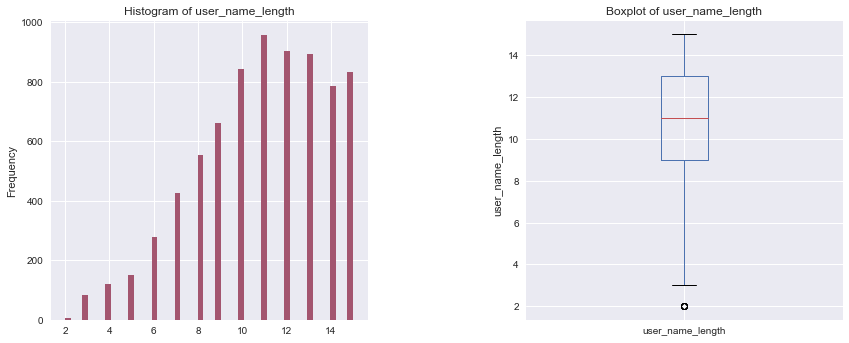

In [87]:
histogramAndBoxplot('user_name_length', '#A3556F')

### Number of Followers

#### Number of Followers - Original Values

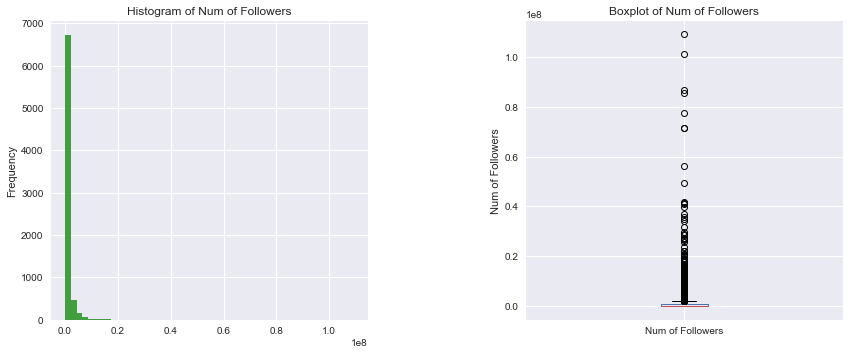

In [88]:
histogramAndBoxplot('Num of Followers', '#429E3F')

#### Number of Followers - Log Transformed Values

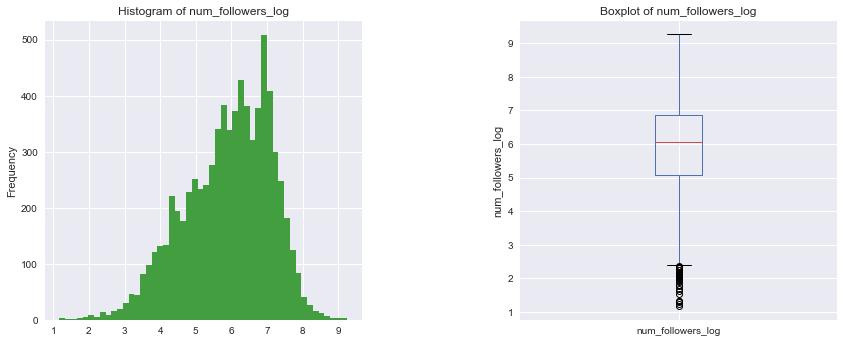

In [89]:
histogramAndBoxplot('num_followers_log', '#429E3F')

### Number of People Following

#### Number of People Following - Original Values

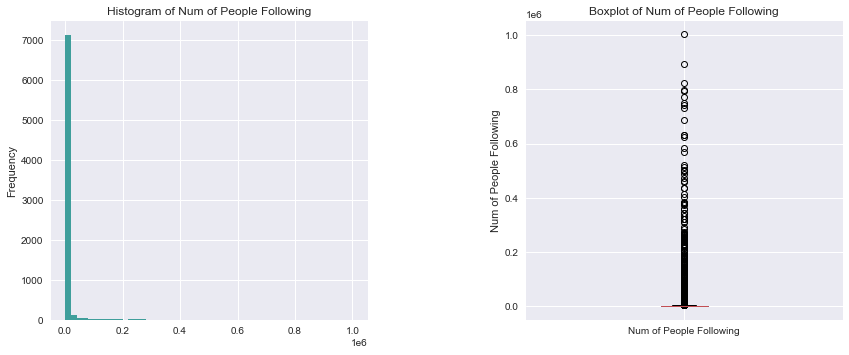

In [90]:
histogramAndBoxplot('Num of People Following', '#3F9E9B')

#### Number of People Following - Log Transformed Values

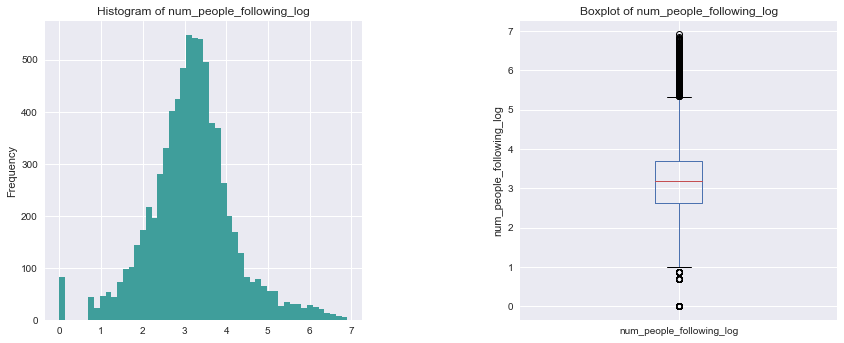

In [91]:
histogramAndBoxplot('num_people_following_log', '#3F9E9B')

### Number of Status Updates

#### Number of Status Updates - Original Values

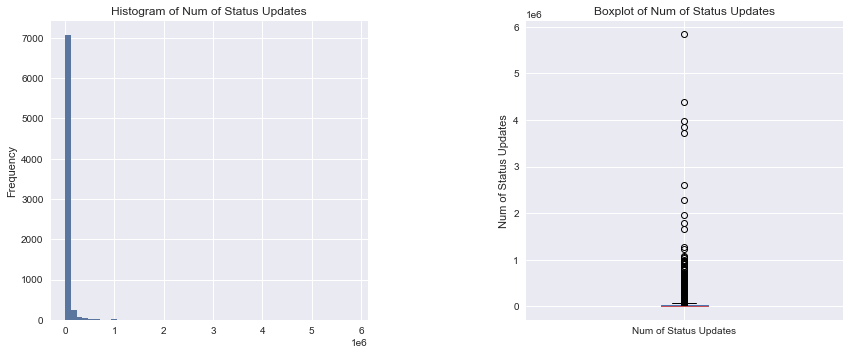

In [92]:
histogramAndBoxplot('Num of Status Updates', '#5A759E')

#### Number of Status Updates - Log Transformed Values

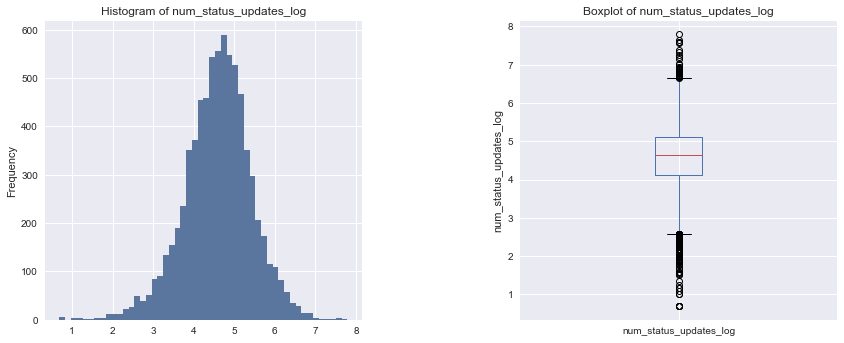

In [93]:
histogramAndBoxplot('num_status_updates_log', '#5A759E')

### Num of Direct Messages

#### Number of Direct Messages - Original Values

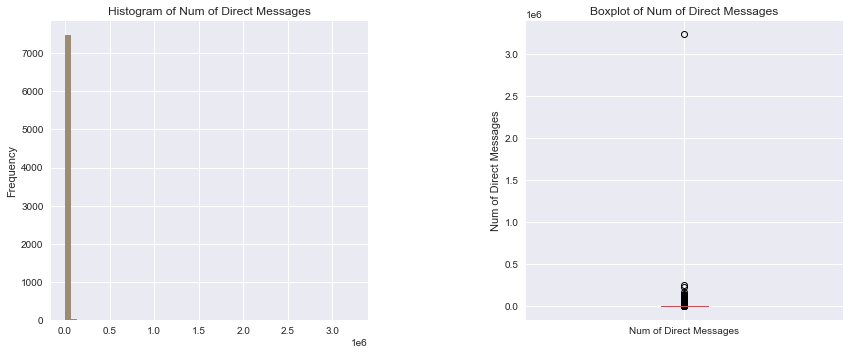

In [94]:
histogramAndBoxplot('Num of Direct Messages', '#9C8C72')

#### Number of Direct Messages - Log Transformed Values

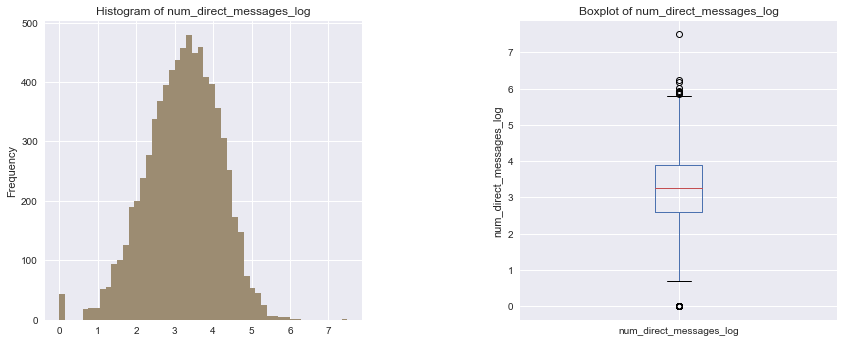

In [95]:
histogramAndBoxplot('num_direct_messages_log', '#9C8C72')

### Avg Daily Profile Visit Duration in seconds

#### Average Daily Profile Visit Duration in seconds - Original Values

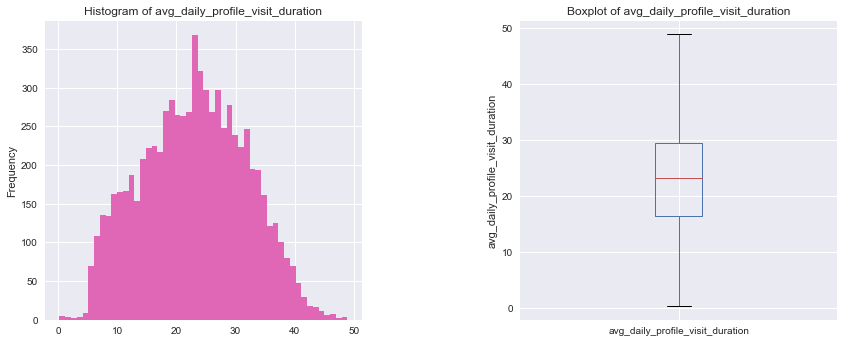

In [96]:
histogramAndBoxplot('avg_daily_profile_visit_duration', '#E067B5')

### Average Daily Profile Clicks

#### Average Daily Profile Clicks - Original Values

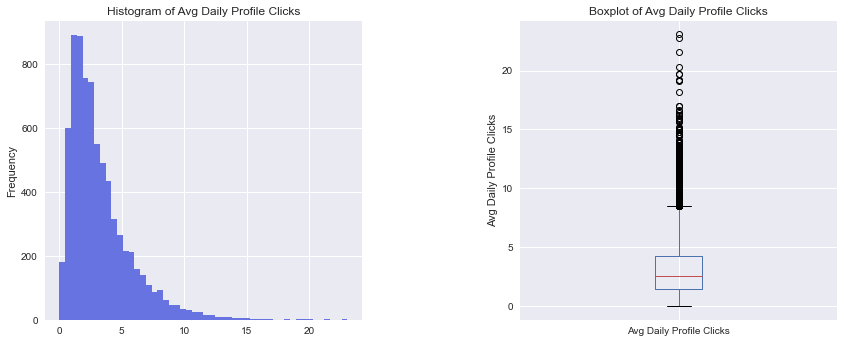

In [97]:
histogramAndBoxplot('Avg Daily Profile Clicks', '#6773E0')

#### Average Daily Profile Clicks - Log Transformed Values

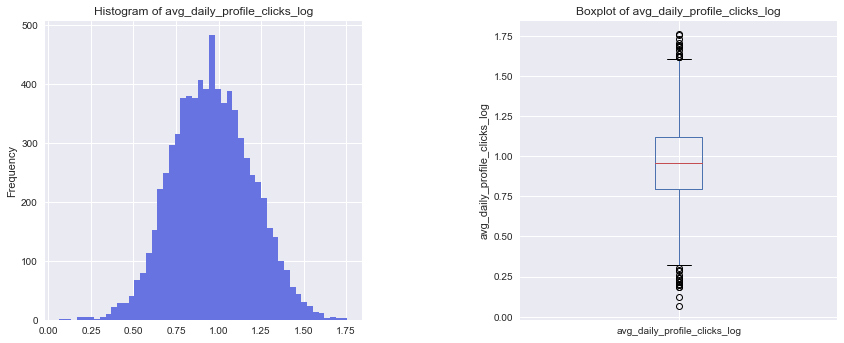

In [98]:
histogramAndBoxplot('avg_daily_profile_clicks_log', '#6773E0')

### Number of Profile Likes

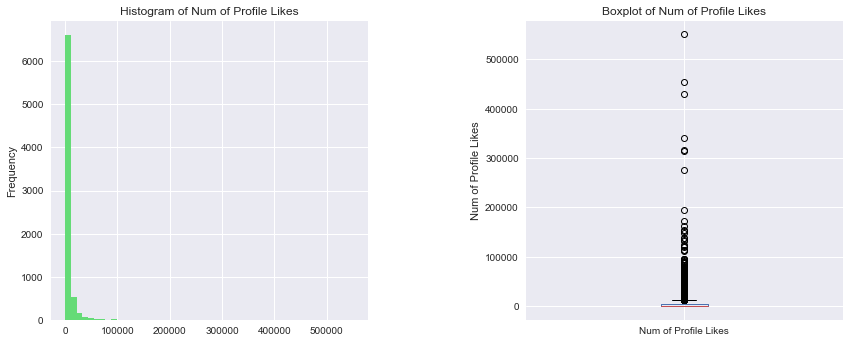

In [99]:
histogramAndBoxplot('Num of Profile Likes', '#65DB77')

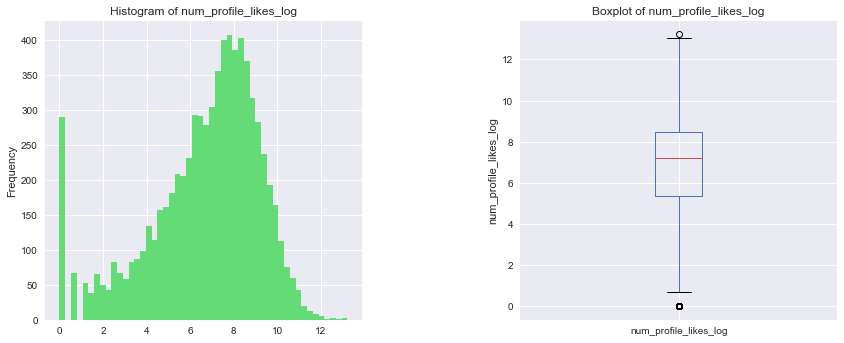

In [100]:
histogramAndBoxplot('num_profile_likes_log', '#65DB77')

### Pair-Plots

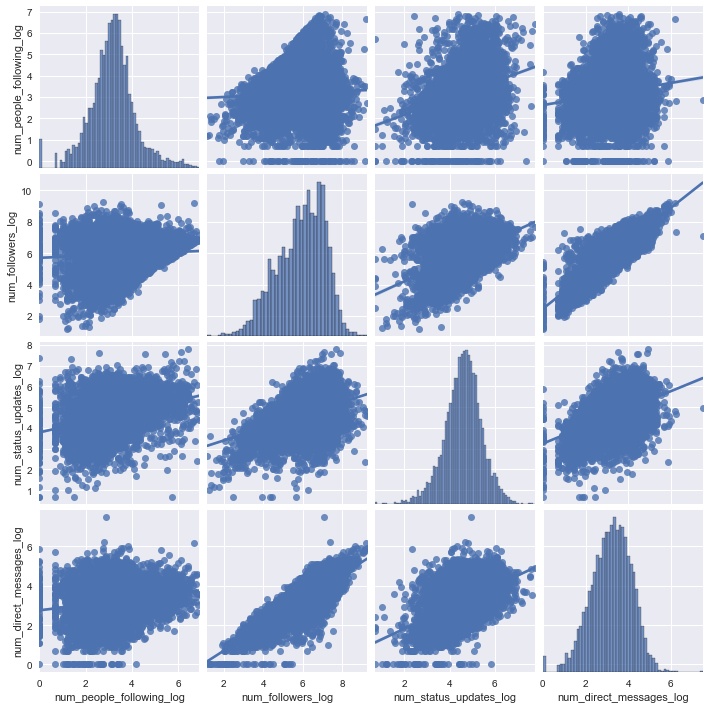

In [101]:
sns.pairplot(df_train_clean, 
             vars=['num_people_following_log', 'num_followers_log', 'num_status_updates_log', 'num_direct_messages_log'], 
             kind='reg')

In [102]:
df_train_clean.head()

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,Location,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Num of Profile Likes,Unnamed: 0,image_hex_color,image_rgb_color,num_profile_likes_log,user_name_length,personal_url_binary,cover_image_binary,verification_status_not verified,verification_status_pending,verification_status_verified,profile_text_color,profile_text_color_aqua,profile_text_color_black,profile_text_color_blue,profile_text_color_fuchsia,profile_text_color_gray,profile_text_color_green,profile_text_color_lime,profile_text_color_maroon,profile_text_color_navy,profile_text_color_olive,profile_text_color_purple,profile_text_color_red,profile_text_color_silver,profile_text_color_teal,profile_text_color_white,profile_text_color_yellow,profile_page_color,profile_page_color_aqua,profile_page_color_black,profile_page_color_blue,profile_page_color_fuchsia,profile_page_color_gray,profile_page_color_green,profile_page_color_lime,profile_page_color_maroon,profile_page_color_navy,profile_page_color_olive,profile_page_color_purple,profile_page_color_red,profile_page_color_silver,profile_page_color_teal,profile_page_color_white,profile_page_color_yellow,profile_theme_color,profile_theme_color_aqua,profile_theme_color_black,profile_theme_color_blue,profile_theme_color_fuchsia,profile_theme_color_gray,profile_theme_color_green,profile_theme_color_lime,profile_theme_color_maroon,profile_theme_color_navy,profile_theme_color_olive,profile_theme_color_purple,profile_theme_color_red,profile_theme_color_silver,profile_theme_color_teal,profile_theme_color_white,profile_theme_color_yellow,profile_view_size_custom,utc_offset,utc_offset__-10800.0,utc_offset__-14400.0,utc_offset__-18000.0,utc_offset__-21600.0,utc_offset__-25200.0,utc_offset__-28800.0,utc_offset__-36000.0,utc_offset__-39600.0,utc_offset__-7200.0,utc_offset__10800.0,utc_offset__14400.0,utc_offset__18000.0,utc_offset__19800.0,utc_offset__25200.0,utc_offset__28800.0,utc_offset__32400.0,utc_offset__3600.0,utc_offset__36000.0,utc_offset__39600.0,utc_offset__46800.0,utc_offset__7200.0,utc_offset__other,utc_offset__unk,location_clean,location_top,location_top_brazil,location_top_france,location_top_india,location_top_indonesia,location_top_mexico,location_top_other,location_top_spain,location_top_turkey,location_top_united kingdom,location_top_united states,location_top_worldwide,location_binary,location_public_binary,user_language,user_lang_ar,user_lang_de,user_lang_en,user_lang_en-gb,user_lang_es,user_lang_fr,user_lang_id,user_lang_it,user_lang_ja,user_lang_ko,user_lang_nl,user_lang_other,user_lang_pl,user_lang_pt,user_lang_ru,user_lang_tr,profile_creation_timestamp,profile_creation_year,profile_creation_month,profile_creation_day,user_timezone,user_timezone_abu dhabi,user_timezone_alaska,user_timezone_america/new_york,user_timezone_amsterdam,user_timezone_arizona,user_timezone_athens,user_timezone_atlantic time (canada),user_timezone_baghdad,user_timezone_bangkok,user_timezone_beijing,user_timezone_belgrade,user_timezone_berlin,user_timezone_bern,user_timezone_bogota,user_timezone_brasilia,user_timezone_brussels,user_timezone_buenos aires,user_timezone_cairo,user_timezone_caracas,user_timezone_casablanca,user_timezone_central america,user_timezone_central time (us & canada),user_timezone_chennai,user_timezone_copenhagen,user_timezone_dublin,user_timezone_eastern time (us & canada),user_timezone_greenland,user_timezone_hanoi,user_timezone_hawaii,user_timezone_hong kong,user_timezone_irkutsk,user_timezone_islamabad,user_timezone_istanbul,user_timezone_jakarta,user_timezone_jerusalem,user_timezone_karachi,user_timezone_kuala lumpur

In [103]:
df_test_clean.head()

,Id,User Name,Personal URL,Profile Cover Image Status,Profile Verification Status,Profile Text Color,Profile Page Color,Profile Theme Color,Is Profile View Size Customized?,UTC Offset,Location,Location Public Visibility,User Language,Profile Creation Timestamp,User Time Zone,Num of Followers,Num of People Following,Num of Status Updates,Num of Direct Messages,Profile Category,Avg Daily Profile Visit Duration in seconds,Avg Daily Profile Clicks,Profile Image,Unnamed: 0,image_hex_color,image_rgb_color,user_name_length,personal_url_binary,cover_image_binary,verification_status_not verified,verification_status_pending,verification_status_verified,profile_text_color,profile_text_color_aqua,profile_text_color_black,profile_text_color_blue,profile_text_color_fuchsia,profile_text_color_gray,profile_text_color_green,profile_text_color_lime,profile_text_color_maroon,profile_text_color_navy,profile_text_color_olive,profile_text_color_purple,profile_text_color_red,profile_text_color_silver,profile_text_color_teal,profile_text_color_white,profile_text_color_yellow,profile_page_color,profile_page_color_aqua,profile_page_color_black,profile_page_color_blue,profile_page_color_fuchsia,profile_page_color_gray,profile_page_color_green,profile_page_color_lime,profile_page_color_maroon,profile_page_color_navy,profile_page_color_olive,profile_page_color_purple,profile_page_color_red,profile_page_color_silver,profile_page_color_teal,profile_page_color_white,profile_page_color_yellow,profile_theme_color,profile_theme_color_aqua,profile_theme_color_black,profile_theme_color_blue,profile_theme_color_fuchsia,profile_theme_color_gray,profile_theme_color_green,profile_theme_color_lime,profile_theme_color_maroon,profile_theme_color_navy,profile_theme_color_olive,profile_theme_color_purple,profile_theme_color_red,profile_theme_color_silver,profile_theme_color_teal,profile_theme_color_white,profile_theme_color_yellow,profile_view_size_custom,utc_offset,utc_offset__-10800.0,utc_offset__-14400.0,utc_offset__-18000.0,utc_offset__-21600.0,utc_offset__-25200.0,utc_offset__-28800.0,utc_offset__-36000.0,utc_offset__-7200.0,utc_offset__10800.0,utc_offset__14400.0,utc_offset__19800.0,utc_offset__25200.0,utc_offset__28800.0,utc_offset__32400.0,utc_offset__3600.0,utc_offset__39600.0,utc_offset__7200.0,utc_offset__other,utc_offset__unk,location_clean,location_top,location_top_brazil,location_top_france,location_top_india,location_top_indonesia,location_top_mexico,location_top_other,location_top_spain,location_top_turkey,location_top_united kingdom,location_top_united states,location_top_worldwide,location_binary,location_public_binary,user_language,user_lang_ar,user_lang_de,user_lang_en,user_lang_en-gb,user_lang_es,user_lang_fr,user_lang_it,user_lang_ja,user_lang_ko,user_lang_nl,user_lang_other,user_lang_pt,user_lang_ru,user_lang_tr,profile_creation_timestamp,profile_creation_year,profile_creation_month,profile_creation_day,user_timezone,user_timezone_alaska,user_timezone_amsterdam,user_timezone_arizona,user_timezone_athens,user_timezone_atlantic time (canada),user_timezone_baghdad,user_timezone_bangkok,user_timezone_berlin,user_timezone_bern,user_timezone_bogota,user_timezone_brasilia,user_timezone_buenos aires,user_timezone_cairo,user_timezone_caracas,user_timezone_casablanca,user_timezone_central america,user_timezone_central time (us & canada),user_timezone_chennai,user_timezone_dublin,user_timezone_eastern time (us & canada),user_timezone_greenland,user_timezone_hawaii,user_timezone_istanbul,user_timezone_jakarta,user_timezone_kuala lumpur,user_timezone_kuwait,user_timezone_london,user_timezone_madrid,user_timezone_mexico city,user_timezone_mountain time (us & canada),user_timezone_mumbai,user_timezone_muscat,user_timezone_nairobi,user_timezone_new delhi,user_timezone_other,user_timezone_pacific time (us & canada),user_timezone_paris,user_timezone_pretoria,user_timezone_quito,user_timezone_riyadh,user_timezone_rome,user_timezone_santiago,user_timezone_seoul,user_ti

## Data Export

In [104]:
df_train_clean.to_csv('data/ift6758-a20/train_clean.csv', index=False)

In [105]:
df_test_clean.to_csv('data/ift6758-a20/test_clean.csv', index=False)